# PFAS Urban Creeks and Ambient Location February & April 2024 Sampling

### 1) Libraries Import (REQUIRED)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import openpyxl 
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, FixedFormatter
import scipy.stats as stats

### 2) Data Import and Export (REQUIRED)

Please note that there are a couple of different ways to import the data. Please choose the most convenient way for your analysis.

#### Define Functions for Data Import and Export (Required)

In [2]:
def read_excel_sheet(excel_file, sheet_name):
    """
    Read a specific sheet from an Excel file into a DataFrame.

    Args:
        excel_file (str): The path to the Excel file.
        sheet_name (str): The name of the sheet to read.

    Returns:
        pd.DataFrame or None: A DataFrame containing the sheet data or None if the sheet is not found.
    """
    try:
        # Load the specified sheet from the Excel file into a DataFrame
        df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
        return df
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [3]:
def dfs_to_excel(dfs, filename):
    """
    Write an array of dataframes to separate tabs in an Excel file.
    
    Parameters:
    - dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
    - filename: The name of the Excel file to write to.
    """
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for tab_name, df in dfs.items():
            # Write each dataframe to a separate sheet
            df.to_excel(writer, sheet_name=tab_name)
    
    print(f"File '{filename}' has been written with {len(dfs)} tabs.")



#### Import Data from Excel Macro

NOTE: This is the original file format of the PFAS database. This will take the longest but will not require the user to convert the database to a different format. This is the recommended way if wanting to run a few analysis tasks.

In [4]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-30-2025.xlsm'
#Specify sheet name
sheet_name = 'PFAS Database'

#Call data import function
data_df = read_excel_sheet(excel_file_path, sheet_name)

data_df.head()


,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
0,ANODIZE SOLUTIONS (FPT)-43692.3333333333-10:2F...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,10:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,12.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
1,ANODIZE SOLUTIONS (FPT)-43692.3333333333-11Cl-...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,11Cl-PF3OUdS (Report),NaN,<4.70,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
2,ANODIZE SOLUTIONS (FPT)-43692.3333333333-4:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,4:2Fluorotelomersulfonic Acid (Report),NaN,<4.70,ppt_wt_v,...,6.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
3,ANODIZE SOLUTIONS (FPT)-43692.3333333333-6:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,6:2Fluorotelomersulfonic Acid (Report),NaN,<19.0,ppt_wt_v,...,8.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN
4,ANODIZE SOLUTIONS (FPT)-43692.3333333333-8:2Fl...,259452.0,ANODIZE SOLUTIONS (FPT),NaN,2019-08-15 08:00:00,PFAS-CL,8:2Fluorotelomersulfonic Acid (Report),NaN,<9.40,ppt_wt_v,...,10.0,Metal Finisher B,NaN,Metal Finishing,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Import Other Data (REQUIRED)

In [5]:
# Import PFAS Attributes
#Specify sheet name
sheet_name = 'PFAS Attributes'

df_PFAS_Attributes = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Remove rows where 'Database' column contains the text 'TOP'
df_PFAS_Attributes = df_PFAS_Attributes[~df_PFAS_Attributes['Database'].str.contains('TOP', na=False)]

df_PFAS_Attributes = df_PFAS_Attributes.drop_duplicates(subset='Abbrev', keep='first')

# Create a dictionary mapping PFAS Compounds to their corresponding Abbreviation (No need to change)
pfas_mapping = dict(zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['Abbrev']))

def parse_rgb(rgb_string):
    # Check if rgb_string is a string and not empty
    if isinstance(rgb_string, str) and rgb_string:
        # Remove parentheses and split the string by commas
        rgb_values = rgb_string.strip('()').split(',')
        # Convert each value to float and return as a tuple
        return tuple(int(value)/255 for value in rgb_values)
    else:
        # Handle the case where rgb_string is not a string or is empty
        return None  # or return (0, 0, 0, 0) for a default transparent color, for example



# Create a dictionary with PFAS compounds as keys and corresponding colors as values
compound_colors_dict = {compound: parse_rgb(rgb) for compound, rgb in zip(df_PFAS_Attributes['Database'], df_PFAS_Attributes['RGB'])}
compound_colors_dict_abbrev = {abbrev: parse_rgb(rgb) for abbrev, rgb in zip(df_PFAS_Attributes['Abbrev'], df_PFAS_Attributes['RGB'])}

In [6]:
desired_order=['3:3FTCA', '5:3FTCA', '7:3FTCA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnA', 'PFDoA', 'PFTrDA', 'PFTeDA', 'PFHxDA', 'PFODA', 'NEtFOSAA', 'NMeFOSAA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'PFOS', 'PFNS', 'PFDS', 'PFDoS', 'PFMPA', 'HFPO-DA', 'NFDHA', 'PFMBA', 'ADONA', '4:2FTS', '6:2FTS', '8:2FTS', '10:2FTS', 'NEtFOSA', 'NMeFOSA', 'FOSA', 'NEtFOSE', 'NMeFOSE', 'PFEESA', '9Cl-PF3ONS', '11Cl-PF3OUdS', 'AOF']

#### 3.2 Import Industry Flows

In [7]:
# Specify the sheet name or index
sheet_to_read = 'June 2023 MH and Ind Flows'

# Since you want to start at row 15, you need to skip the first 14 rows (considering the first row as row 1)
# Note: pandas uses 0-based indexing, so row 15 in Excel is row 14 in pandas, hence skiprows=14
skiprows = 14

# Number of rows to read starting from row 15 to row 87 is 87 - 15 + 1 = 73
# +1 because the end row is inclusive
nrows = 73

# Read the specified range of rows from the specified sheet
Industry_Flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_to_read, skiprows=skiprows, nrows=nrows)

Industry_Flows_df


,Industry,Permitted Industry Flow (MGD),WRRF,PFAS Data,Type,Fraction of Total Ind Flow to WRRF,PFAS Assumption
0,Fujimi Corporation,0.021666,Durham,x,NaN,0.021380,Fujimi Corporation
1,Cascade Columbia Distribution Co,0.006538,Durham,NaN,Chemicals,0.006452,TOK America
2,Maxim (Analog),0.516057,Durham,x,NaN,0.509260,Maxim (Analog)
3,Pacific Foods,0.332290,Durham,NaN,Foods,0.327913,Zero
4,Pacific Nutritional Foods,0.033434,Durham,NaN,Foods,0.032994,Zero
...,...,...,...,...,...,...,...
67,Oregon Health Sciences University West Campus ...,0.047622,Rock Creek,NaN,Noncommercial Research,0.007483,Zero
68,DEQ Laboratory,0.002800,Rock Creek,NaN,Noncommercial Research,0.000440,Zero
69,"Alliance Packaging, Inc.",0.000346,Rock Creek,NaN,Paper Products,0.000054,International Paper
70,"Genentech, Inc.",0.045660,Rock Creek,NaN,Pharmaceutical Manufacturing,0.007175,Zero


### Setting Up Figure Standard Settings

In [8]:
# Set default tick label size
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

# Set default font size for title, labels, and legend
plt.rcParams['axes.titlesize'] = 30  # Set the font size for plot titles
plt.rcParams['axes.labelsize'] = 24  # Set the font size for axis labels
plt.rcParams['legend.fontsize'] = 20  # Set the font size for legend
plt.rcParams['legend.title_fontsize'] = 20  # Set the font size for legend

# Set default font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Set default font type for plot titles to bold
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'  #for stack bars

### Data Overview

In [9]:
# Convert the 'Sampled Date' to datetime
data_df['Sampled Date'] = pd.to_datetime(data_df['Sampled Date'], errors='coerce')
filter_Sample_Locations = ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Ash Creek @ Greenburg','Fanno @ SW North Dakota St','Fanno @ SW Bonita Rd','Rock @ NW Old Cornelius Pass Rd',
                           'Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Dawson @ Brookwood','Rock @ River Rd','Fanno @ Durham Park',
                           'Fanno @ SW Grant Ave','Rock @ Brookwood','Beaverton @ Cornelius','Dairy @ Hwy 8','Chicken @ Sholls-Sherwood','Scoggins Below Hagg','Gales @ Stringtown',
                           'McKay @ Padgett','TR @ Cherry Grove','TR @ Golf Course','TR @ Farmington','Fanno at Durham Rd','TR @ Jurgens','TR @ Fernhill','TR @ Boones Ferry',
                           'TR @ Rood Br','Durham Effluent','Rock Creek Effluent']

In [10]:
data_RCEffluent = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024')]
data_DurhamEffluent = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024')]

data_RCEffluent_Apr2023 = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent')  & (data_df['Sample Date'] == '04/06/2023')]
data_DurhamEffluent_Apr2023 = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Sample Date'] == '04/06/2023')]

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'
data_df_2023 = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date) 
                  & (data_df['Analysis'] == 'PFAS-CL') & (data_df['Sample Name'] == 'Ambient PFAS Project #318')]

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'
data_df = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date) 
                  & (data_df['Analysis'] == 'PFAS-CL')]


data_compounds=data_df['PFAS Compound'].unique()

print('The Ambient and Urban Creeks dataset shape is:',data_df.shape)

The Ambient and Urban Creeks dataset shape is: (2920, 56)


In [11]:
urban_locations=['Rock @ River Rd', 'Rock @ East Main St',
       'Rock @ NE Cornelius Pass Rd', 'Rock @ NW Rock Creek Blvd',
       'Rock @ NW Old Cornelius Pass Rd', 'Fanno @ Durham Park',
       'Fanno @ SW Bonita Rd', 'Fanno @ SW Grant Ave',
       'Fanno @ SW North Dakota St', 'Fanno @ SW 56th Ave',
       'Fanno @ Bohmann','Ash Creek @ Greenburg','Dawson @ Brookwood',
       'Fanno @ SW North Dakota St']

urban_data_df=data_df[data_df['Sample Location'].isin(urban_locations)]

print('The Urban Creeks dataset shape is:',urban_data_df.shape)

urban_compounds=urban_data_df['PFAS Compound'].unique()

The Urban Creeks dataset shape is: (800, 56)


In [12]:
ambient_locations= ['TR @ Jurgens', 'TR @ Cherry Grove', 'TR @ Fernhill',
       'TR @ Boones Ferry', 'TR @ Golf Course', 'TR @ Farmington',
       'Fanno at Durham Rd', 'TR @ Rood Br', 'Rock @ Brookwood',
       'Dairy @ Hwy 8', 'Chicken @ Sholls-Sherwood',
       'Scoggins Below Hagg', 'Gales @ Stringtown', 'McKay @ Padgett',
       'Beaverton @ Cornelius']

ambient_data_df=data_df[data_df['Sample Location'].isin(ambient_locations)]
print('The Ambient Creeks dataset shape is:',ambient_data_df.shape)

ambient_compounds=ambient_data_df['PFAS Compound'].unique()


The Ambient Creeks dataset shape is: (1744, 56)


In [13]:
data_df['Analysis'].unique()

array(['PFAS-CL'], dtype=object)

### 6) Compare PFAS Concentrations and Composition at Various Sites

#### 6.1) Functions

In [245]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [246]:
def PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='count', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [247]:
def create_std_dev_pivot_table_with_filters(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                                            filter_sample_location=None, start_date=None, end_date=None, col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with multiple filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'. Calculates the standard deviation of the average.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom standard deviation pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) > 0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and standard deviation of the average as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound',
                                     aggfunc=lambda x: np.std(x, ddof=1), fill_value=None)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [262]:
def create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6), title='Average PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')
        # Filter out locations with all zeros in avg_pivot_table
        avg_pivot_table_filtered = avg_pivot_table.loc[:, (avg_pivot_table != 0).any(axis=0)]
        
        # Filter std_dev_pivot_table to match avg_pivot_table_filtered columns if not empty
        if std_dev_pivot_table is not None and not std_dev_pivot_table.empty:
            std_dev_pivot_table_filtered = std_dev_pivot_table[avg_pivot_table_filtered.columns]
        else:
            std_dev_pivot_table_filtered = pd.DataFrame(columns=avg_pivot_table_filtered.columns, index=avg_pivot_table_filtered.index)
        
        fig, ax = plt.subplots(figsize=figsize)
        bottom = np.zeros(len(avg_pivot_table_filtered.index))

        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound)
            
            bars = ax.bar(avg_pivot_table_filtered.index, avg_values, width=0.35, bottom=bottom, color=color, label=compound, yerr=std_dev_values)
            bottom += avg_values
        #ax.set_ylim(0, 60)
        ax.set_xlabel('Sample Location',fontsize=axis_label_fontsize,fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)',fontsize=axis_label_fontsize,fontproperties=font_bold)
        ax.set_title(title)

        # Modify the x-tick labels
        def split_label(label):
            if len(label) > 14:
                split_point = label.find(' ', 10)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        xtick_labels = [split_label(label) for label in avg_pivot_table_filtered.index]
        ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

        # Generate legend only for compounds actually plotted
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        # Reverse the order of handles and labels
        legend_handles.reverse()
        legend_labels.reverse()
        ax.legend(handles=legend_handles, labels=legend_labels, title='PFAS Compounds', bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=legend_fontsize,title_fontsize=legend_fontsize+2)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")



In [298]:
def create_horizontal_stacked_bar_chart(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6), title='Average PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                        title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12,xlim=50):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')
        # Filter out locations with all zeros in avg_pivot_table
        avg_pivot_table_filtered = avg_pivot_table.loc[:, (avg_pivot_table != 0).any(axis=0)]
        
        # Filter std_dev_pivot_table to match avg_pivot_table_filtered columns if not empty
        if std_dev_pivot_table is not None and not std_dev_pivot_table.empty:
            std_dev_pivot_table_filtered = std_dev_pivot_table[avg_pivot_table_filtered.columns]
        else:
            std_dev_pivot_table_filtered = pd.DataFrame(columns=avg_pivot_table_filtered.columns, index=avg_pivot_table_filtered.index)
        
        fig, ax = plt.subplots(figsize=figsize)
        left = np.zeros(len(avg_pivot_table_filtered.index))  # This replaces the 'bottom' for horizontal bars

        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound)
            
            bars = ax.barh(avg_pivot_table_filtered.index, avg_values, height=0.35, left=left, color=color, label=compound, xerr=std_dev_values)
            left += avg_values
        ax.set_xlim(0, xlim)
        ax.set_ylabel('Sample Location')
        ax.set_xlabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize,fontproperties=font_bold)
        ax.set_title(title)

        # Modify the x-tick labels
        def split_label(label):
            if len(label) > 9:
                split_point = label.find(' ', 9)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        ytick_labels = [split_label(label) for label in avg_pivot_table_filtered.index]

        ax.set_yticklabels(ytick_labels)

        # Generate legend only for compounds actually plotted
        legend_handles, legend_labels = ax.get_legend_handles_labels()

        ax.legend(handles=legend_handles, labels=legend_labels, title='PFAS Compounds', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=legend_fontsize,title_fontsize=legend_fontsize+2,ncol=1)
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


In [291]:
def create_horizontal_stacked_bar_chart_with_legend_below(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6), title='Average PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                                          title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')

        # Define the split_label function
        def split_label(label):
            if len(label) > 14:
                split_point = label.find(' ', 12)  # Find next space after 14th character
                if split_point != -1:
                    return label[:split_point] + '\n' + label[split_point + 1:]
            return label  # Return label unmodified if it's short enough or no space found

        # Filter out locations with all zeros in avg_pivot_table
        avg_pivot_table_filtered = avg_pivot_table.loc[:, (avg_pivot_table != 0).any(axis=0)]

        # Filter std_dev_pivot_table to match avg_pivot_table_filtered columns if not empty
        if std_dev_pivot_table is not None and not std_dev_pivot_table.empty:
            std_dev_pivot_table_filtered = std_dev_pivot_table[avg_pivot_table_filtered.columns]
        else:
            std_dev_pivot_table_filtered = pd.DataFrame(columns=avg_pivot_table_filtered.columns, index=avg_pivot_table_filtered.index)

        fig, ax = plt.subplots(figsize=figsize)
        left = np.zeros(len(avg_pivot_table_filtered.index))  # This replaces the 'bottom' for horizontal bars

        for compound in avg_pivot_table_filtered.columns:
            color = compound_colors_dict.get(compound, 'grey')  # Default grey color
            avg_values = avg_pivot_table_filtered[compound].values
            std_dev_values = std_dev_pivot_table_filtered.get(compound)

            ax.barh(avg_pivot_table_filtered.index, avg_values, height=0.35, left=left, color=color, label=compound, xerr=std_dev_values)
            left += avg_values

        ax.set_ylabel('Sample Location')
        ax.set_xlabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title)

        # Modify the y-tick labels
        ytick_labels = [split_label(label) for label in avg_pivot_table_filtered.index]
        ax.set_yticklabels(ytick_labels)

        # Generate legend only for compounds actually plotted and place it below the plot
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        
        ax.legend(handles=legend_handles, labels=legend_labels, title='PFAS Compounds', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=9, fontsize=legend_fontsize, title_fontsize=legend_fontsize+2)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


In [267]:
def create_individual_horizontal_stacked_bars(avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 6), title_prefix='PFAS Concentration', compound_colors_dict=None,
                                              title_fontsize=22, axis_label_fontsize=18, tick_label_fontsize=16, legend_fontsize=14):
    try:
        font = FontProperties(family='Arial')
        font_bold = FontProperties(family='Arial', weight='bold')
        # Iterate over each location
        for location in avg_pivot_table.index:
            avg_row = avg_pivot_table.loc[location]
            std_dev_row = std_dev_pivot_table.loc[location] if std_dev_pivot_table is not None and not std_dev_pivot_table.empty else pd.Series(index=avg_row.index)

            # Filter out zero values
            non_zero_compounds = avg_row[avg_row != 0]
            if non_zero_compounds.empty:
                print(f"No data to plot for {location}")
                continue  # Skip locations with no data

            # Setup plot
            fig, ax = plt.subplots(figsize=figsize)
            left = np.zeros(1)  # Start bars from 0

            # Plot bars
            for compound in non_zero_compounds.index:
                color = compound_colors_dict.get(compound, 'grey')  # Use grey if no color specified
                avg_value = non_zero_compounds[compound]
                std_dev_value = std_dev_row.get(compound, None)

                ax.barh([location], [avg_value], height=0.35, left=left, color=color, label=compound, xerr=[std_dev_value] if std_dev_value is not None else None)
                left += avg_value  # Move left boundary for the next bar

            # Axis and title setup
            ax.set_xlabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize,fontproperties=font)
            ax.set_title(f'{title_prefix} at {location}')
            ax.set_yticks('')
            ax.set_yticklabels('', fontsize=tick_label_fontsize,fontproperties=font)

            # Legend below the plot
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.7), ncol=4, fontsize=legend_fontsize, title='PFAS Compounds')
            plt.tick_params(axis='x', labelsize=tick_label_fontsize)

            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")



In [268]:
def create_total_pfas_df(avg_pivot_table):
    # Create a new DataFrame with the sum of all PFAS compounds for each location
    total_pfas_df = avg_pivot_table.sum(axis=1).to_frame(name='PFAS Total')
    return total_pfas_df

### Rock Creek

In [299]:
# For Rock Creek
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Rock @ River Rd', 'Rock @ East Main St',
       'Rock @ NE Cornelius Pass Rd', 'Rock @ NW Rock Creek Blvd',
       'Rock @ NW Old Cornelius Pass Rd','Rock @ Brookwood']

rows_order= ['Rock @ NW Old Cornelius Pass Rd','Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Rock @ Brookwood','Rock @ River Rd']
rows_order_reverse=[ 'Rock @ River Rd','Rock @ Brookwood','Rock @ East Main St','Rock @ NE Cornelius Pass Rd','Rock @ NW Rock Creek Blvd','Rock @ NW Old Cornelius Pass Rd'
                    ]

rows_order= ['Rock @ NW Old Cornelius Pass Rd','Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Rock @ Brookwood']
rows_order_reverse=[ 'Rock @ Brookwood','Rock @ East Main St','Rock @ NE Cornelius Pass Rd','Rock @ NW Rock Creek Blvd','Rock @ NW Old Cornelius Pass Rd'
                    ]
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-12-30'

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [300]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date,
                                                                                   col_name=col_name)
avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]

#avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')
#avg_pivot_table.index = avg_pivot_table.index.str.replace( 'NW', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' NE', '')
#avg_pivot_table.index = avg_pivot_table.index.str.replace(' Old', '')


avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock @ NW Old Cornelius Pass Rd,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
Rock @ NW Rock Creek Blvd,0,0,0,2.4,1.7,1.6,1.4,4.6,0.45,0.00,...,0,0,0,0,0,0,0,0,0,0
Rock @ NE Cornelius Pass Rd,0,0,0,2.7,2.3,2.0,1.4,3.9,0.56,0.00,...,0,0,0,0,0,0,0,0,0,0
Rock @ East Main St,0,0,0,3.0,3.0,2.3,1.7,4.3,0.82,0.00,...,0,0,0,0,0,0,0,0,0,0
Rock @ Brookwood,0,0,0,4.2,4.6,4.2,1.9,4.9,0.97,0.49,...,0,0,0,0,0,0,0,0,0,0


In [301]:
Rock_PFASTotal=create_total_pfas_df(avg_pivot_table)

Rock_PFASTotal

,PFAS Total
Sample Location,
Rock @ NW Old Cornelius Pass Rd,0.00
Rock @ NW Rock Creek Blvd,16.38
Rock @ NE Cornelius Pass Rd,18.25
Rock @ East Main St,21.12
Rock @ Brookwood,34.96


##### 6.6) Stacked Bar Chart with Error Bars

<ipython-input-262-ce3676c347da>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45, ha='right')


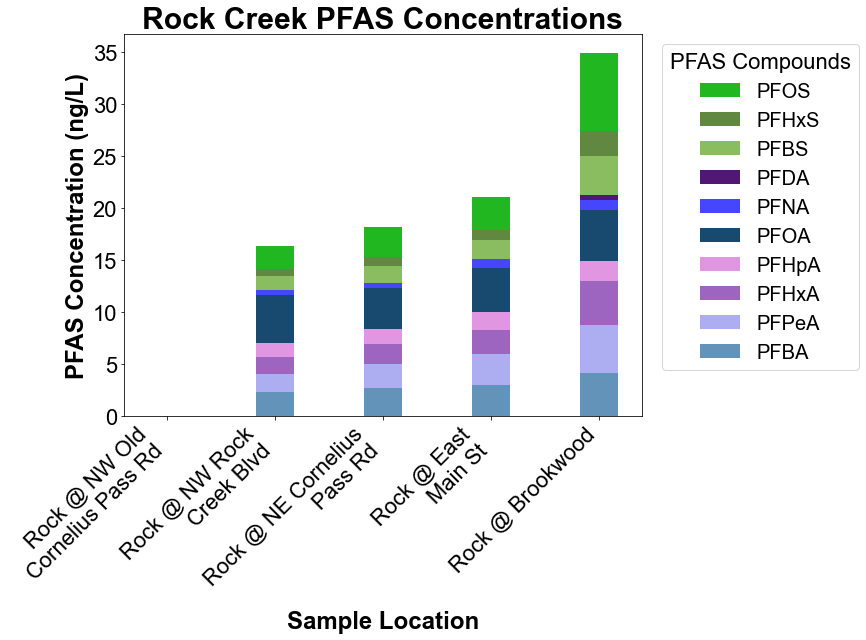

In [302]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(12, 9),title='Rock Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)


<ipython-input-298-41e2f10c6c10>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


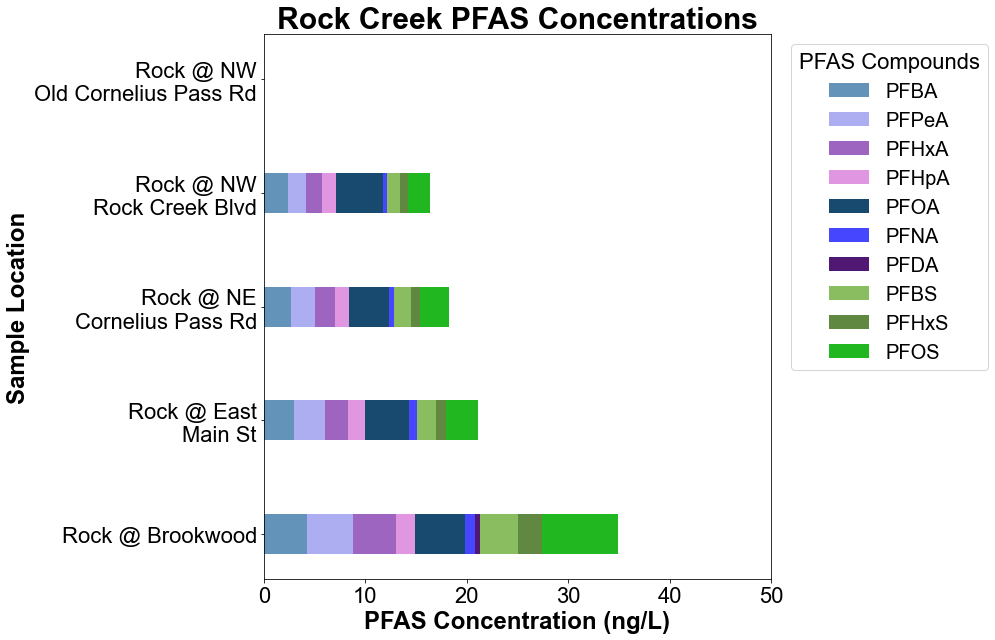

In [303]:
create_horizontal_stacked_bar_chart(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 9),title='Rock Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

<ipython-input-291-bd444e0082d6>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


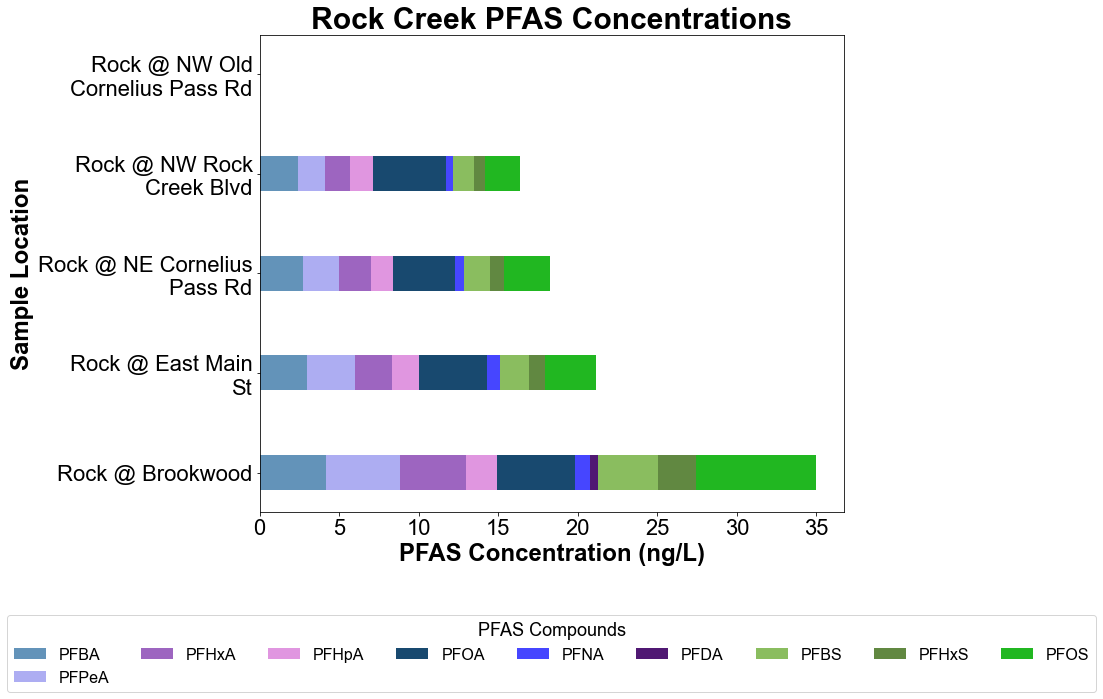

In [304]:
create_horizontal_stacked_bar_chart_with_legend_below(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 10),title='Rock Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16)

### 6B.2)Fanno Creek

In [305]:
# For Urban Creeks
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound=data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Fanno @ Durham Park','Fanno @ Bohmann',
       'Fanno @ SW Bonita Rd', 'Fanno @ SW Grant Ave',
       'Fanno @ SW North Dakota St', 'Fanno @ SW 56th Ave','Fanno at Durham Rd']

rows_order= ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Fanno @ SW North Dakota St','Fanno @ SW Grant Ave','Fanno @ SW Bonita Rd','Fanno at Durham Rd','Fanno @ Durham Park']
rows_order_reverse=['Fanno @ Durham Park','Fanno @ Durham Rd','Fanno @ SW Bonita Rd','Fanno @ SW Grant Ave','Fanno @ SW North Dakota St','Fanno @ Bohmann','Fanno @ SW 56th Ave'
                    ]

rows_order= ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Fanno @ SW North Dakota St','Fanno @ SW Bonita Rd','Fanno at Durham Rd']
rows_order_reverse=['Fanno @ Durham Rd','Fanno @ SW Bonita Rd','Fanno @ SW North Dakota St','Fanno @ Bohmann','Fanno @ SW 56th Ave'
                    ]
                    
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [306]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)
avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]

avg_pivot_table.index = avg_pivot_table.index.str.replace('Fanno at', 'Fanno @')


avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno @ SW 56th Ave,0,0,0,2.1,2.3,2.4,0.95,4.3,0.75,0.00,...,0,0,0,0,0,0,0,0,0,0
Fanno @ Bohmann,0,0,0,2.7,4.4,4.3,1.90,6.3,0.87,0.59,...,0,0,0,0,0,0,0,0,0,0
Fanno @ SW North Dakota St,0,0,0,3.7,5.1,5.0,2.10,7.4,1.10,0.94,...,0,0,0,0,0,0,0,0,0,0
Fanno @ SW Bonita Rd,0,0,0,3.7,5.3,4.4,2.40,6.8,1.00,0.69,...,0,0,0,0,0,0,0,0,0,0
Fanno @ Durham Rd,0,0,0,3.6,5.5,5.1,2.30,7.4,0.99,0.98,...,0,0,0,0,0,0,0,0,0,0


In [307]:
PivotTable_CountPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df, filter_qual_summary=filter_qual_summary, filter_pfas_compound=filter_pfas_compound,
                              filter_sample_location=filter_sample_location, start_date=start_date, end_date=end_date,col_name= col_name)

PFAS Compound,11Cl-PF3OUdS,3:3 FTCA,4:2 Fluorotelomersulfonic acid,5:3 FTCA,6:2 Fluorotelomersulfonic acid,7:3 FTCA,8:2 Fluorotelomersulfonic acid,9Cl-PF3ONS,ADONA,HFPO-DA,...,Perfluorononanesulfonic acid,Perfluorononanoic acid,Perfluorooctanesulfonamide,Perfluorooctanesulfonic acid (PFOS),Perfluorooctanoic acid (PFOA),Perfluoropentanesulfonic acid,Perfluoropentanoic acid,Perfluorotetradecanoic acid,Perfluorotridecanoic acid,Perfluoroundecanoic acid
Sample Location,,,,,,,,,,,,,,,,,,,,,
Fanno @ Bohmann,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fanno @ SW 56th Ave,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fanno @ SW Bonita Rd,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fanno @ SW North Dakota St,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fanno at Durham Rd,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [308]:
Fanno_PFASTotal=create_total_pfas_df(avg_pivot_table)

Fanno_PFASTotal

,PFAS Total
Sample Location,
Fanno @ SW 56th Ave,30.44
Fanno @ Bohmann,38.06
Fanno @ SW North Dakota St,51.13
Fanno @ SW Bonita Rd,46.57
Fanno @ Durham Rd,47.85


<ipython-input-262-ce3676c347da>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45, ha='right')


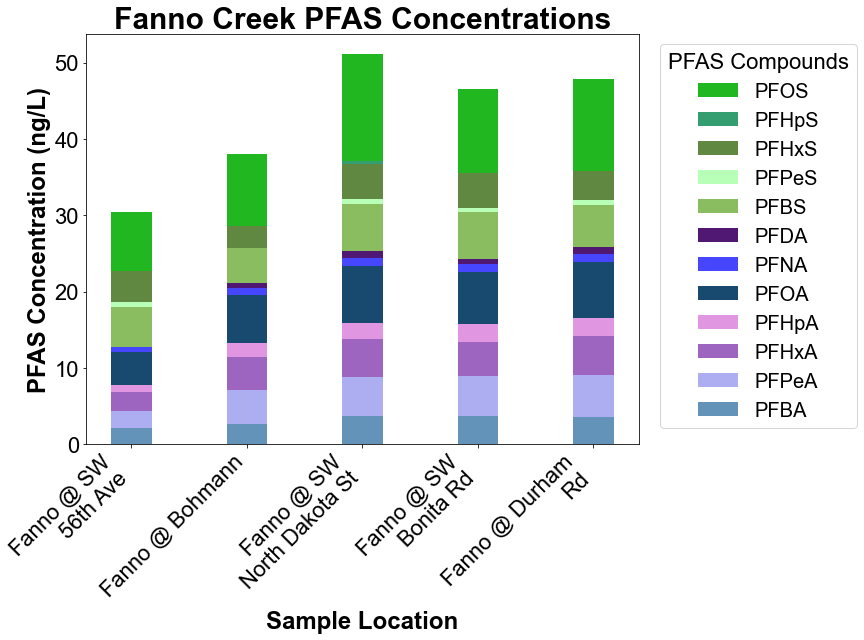

In [309]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(12, 9),title='Fanno Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

<ipython-input-298-41e2f10c6c10>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


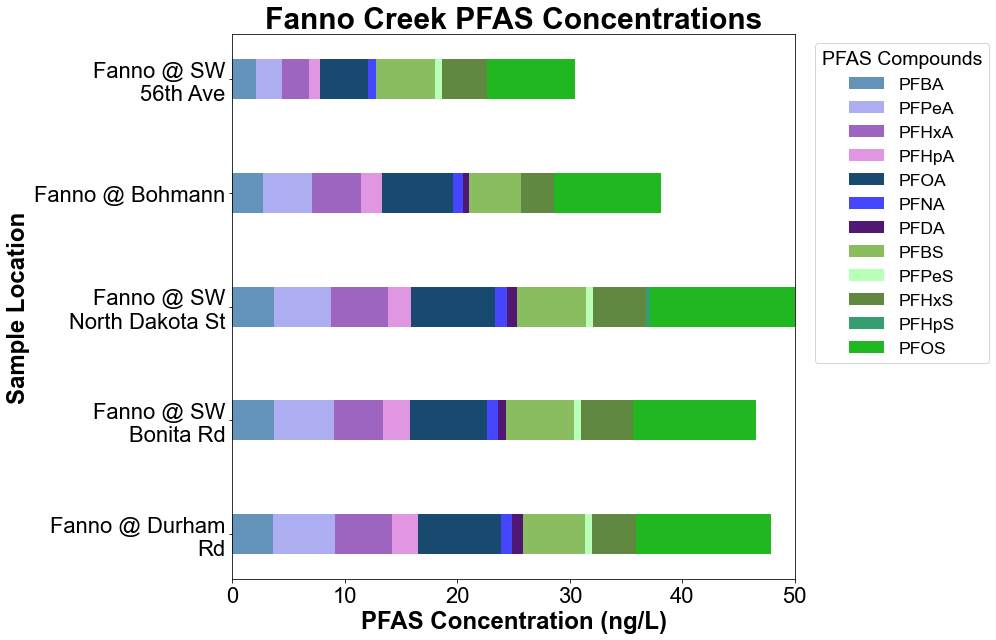

In [310]:
create_horizontal_stacked_bar_chart(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 9),title='Fanno Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=17.5) #Change legend_fontsize to 20 or adjust so that legend fits

<ipython-input-291-bd444e0082d6>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


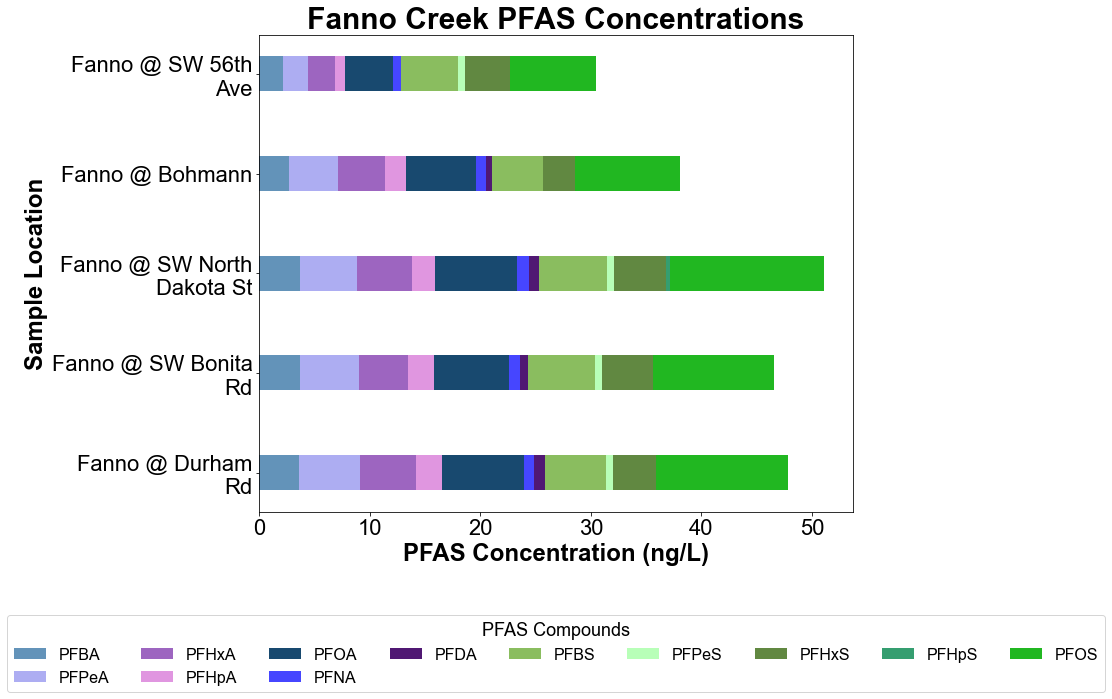

In [311]:
create_horizontal_stacked_bar_chart_with_legend_below(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 10),title='Fanno Creek PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16)

### 6C) Stacked Bar for Ambient Locations

In [312]:
# All Ambient Locations

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']

#For 2024 Data

rows_order= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']
rows_order_reverse=['TR @ Boones Ferry','TR @ Jurgens','TR @ Farmington',
                    'TR @ Rood Br','TR @ Golf Course','TR @ Fernhill',
                   'TR @ Cherry Grove'    
                    ]
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2024-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-02-22'

"""
#For 2023
rows_order= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']
rows_order_reverse=['TR @ Boones Ferry','TR @ Jurgens','TR @ Farmington',
                    'TR @ Rood Br','TR @ Golf Course','TR @ Fernhill',
                   'TR @ Cherry Grove'    
                    ]
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-01-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-12-30'
"""

col_name= 'Quant Incl Estimates Incl Qual Flags'


In [313]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)
avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]


avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0,0,0,0,0.0,0.0,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Fernhill,0,0,0,0,0.0,0.0,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Golf Course,0,0,0,0,0.0,0.0,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Rood Br,0,0,0,0,0.0,0.0,0.0,0.98,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Farmington,0,0,0,0,0.0,1.1,0.5,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
Ambient_PFASTotal=create_total_pfas_df(avg_pivot_table)
Ambient_PFASTotal

,PFAS Total
Sample Location,
TR @ Cherry Grove,0.00
TR @ Fernhill,0.00
TR @ Golf Course,0.00
TR @ Rood Br,1.28
TR @ Farmington,5.04
TR @ Jurgens,6.42
TR @ Boones Ferry,8.86


<ipython-input-262-ce3676c347da>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45, ha='right')


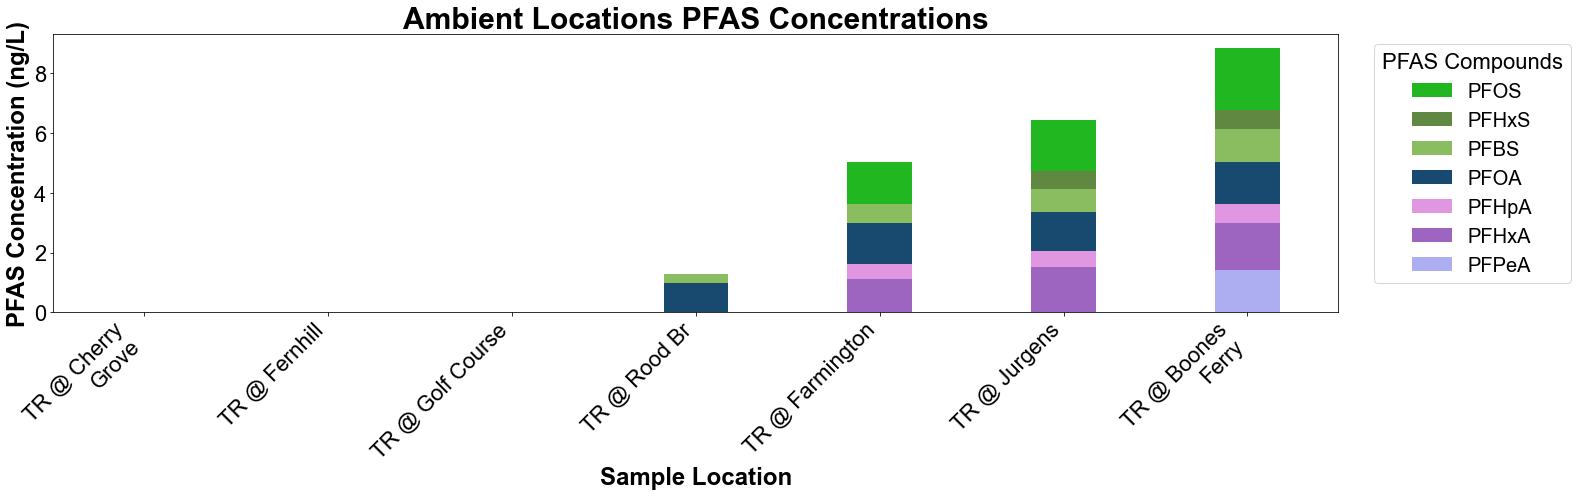

In [316]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(22, 7),title= 'Ambient Locations PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)


<ipython-input-298-41e2f10c6c10>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


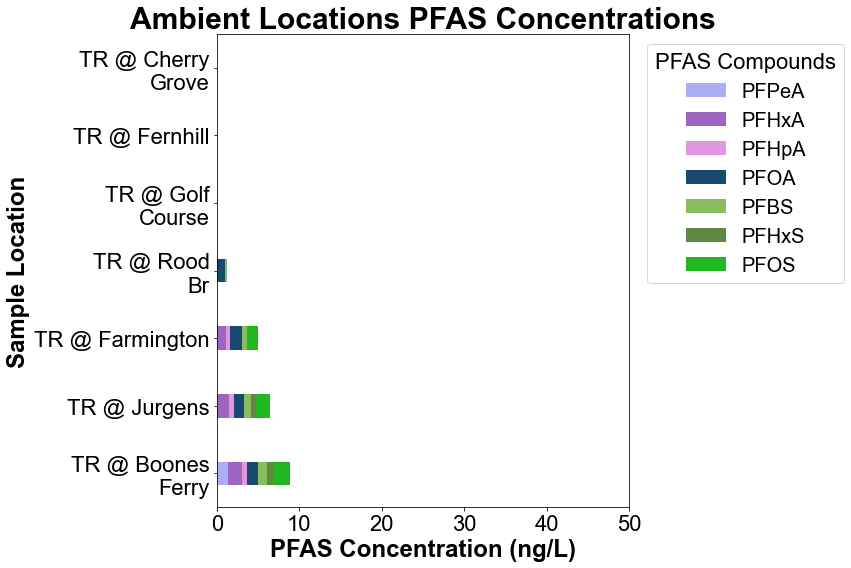

In [317]:
create_horizontal_stacked_bar_chart(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(12, 8),title='Ambient Locations PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

<ipython-input-291-bd444e0082d6>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


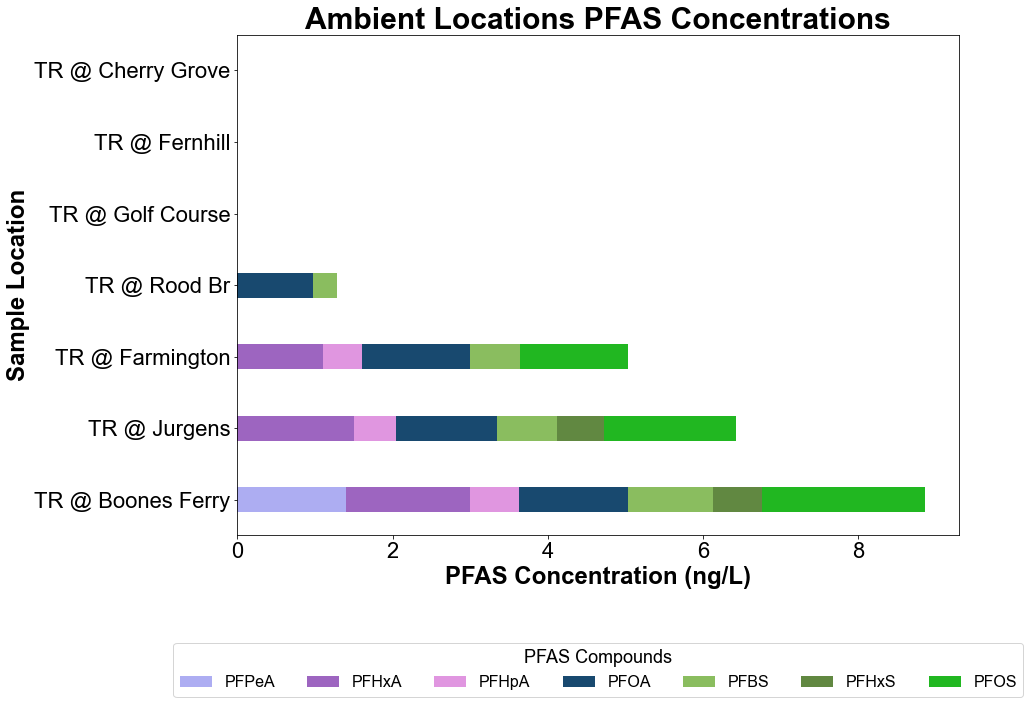

In [318]:
create_horizontal_stacked_bar_chart_with_legend_below(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 10),title='Ambient Locations PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16)

### 6C.2) Individual Stacked Bars

No data to plot for TR @ Cherry Grove
No data to plot for TR @ Fernhill
No data to plot for TR @ Golf Course


<ipython-input-267-9dd7471de598>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


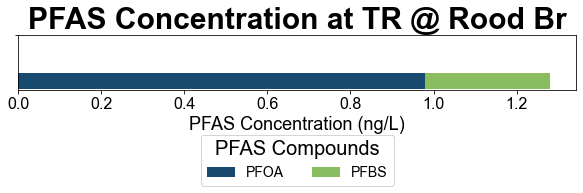

<ipython-input-267-9dd7471de598>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


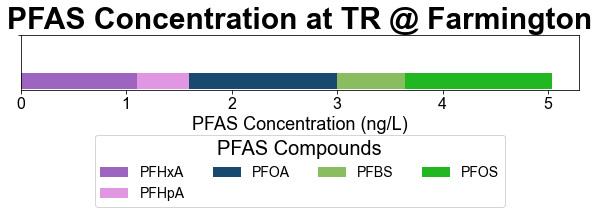

<ipython-input-267-9dd7471de598>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


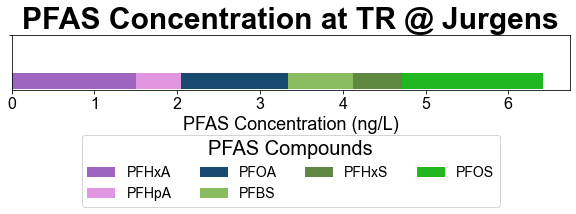

<ipython-input-267-9dd7471de598>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


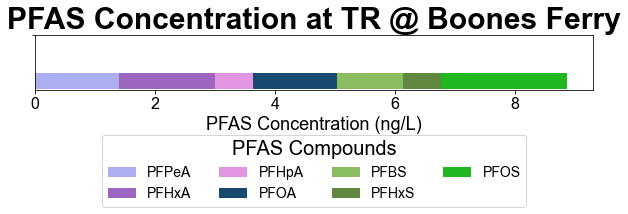

In [319]:
create_individual_horizontal_stacked_bars(avg_pivot_table=avg_pivot_table, std_dev_pivot_table=None, figsize=(10, 1), title_prefix='PFAS Concentration', compound_colors_dict=compound_colors_dict_abbrev,
                                              title_fontsize=22, axis_label_fontsize=18, tick_label_fontsize=16, legend_fontsize=14)

### 6D) Upper Tributaries

In [320]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ambient_locations

rows_order= ['Scoggins Below Hagg','Gales @ Stringtown','Dairy @ Hwy 8','McKay @ Padgett']
rows_order_reverse=['McKay @ Padgett','Dairy @ Hwy 8','Gales @ Stringtown','Scoggins Below Hagg']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2024-04-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-28'

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [321]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)
avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]


avg_pivot_table.index = avg_pivot_table.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')


avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Gales @ Stringtown,0,0,0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Dairy @ Hwy 8,0,0,0,0.0,0.0,0.0,0.00,0.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
McKay @ Padgett,0,0,0,2.2,1.9,1.7,0.88,2.70,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
Upper_PFASTotal=create_total_pfas_df(avg_pivot_table)
Upper_PFASTotal

,PFAS Total
Sample Location,
Scoggins Below Hagg,0.00
Gales @ Stringtown,0.00
Dairy @ Hwy 8,1.58
McKay @ Padgett,10.87


<ipython-input-262-ce3676c347da>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45, ha='right')


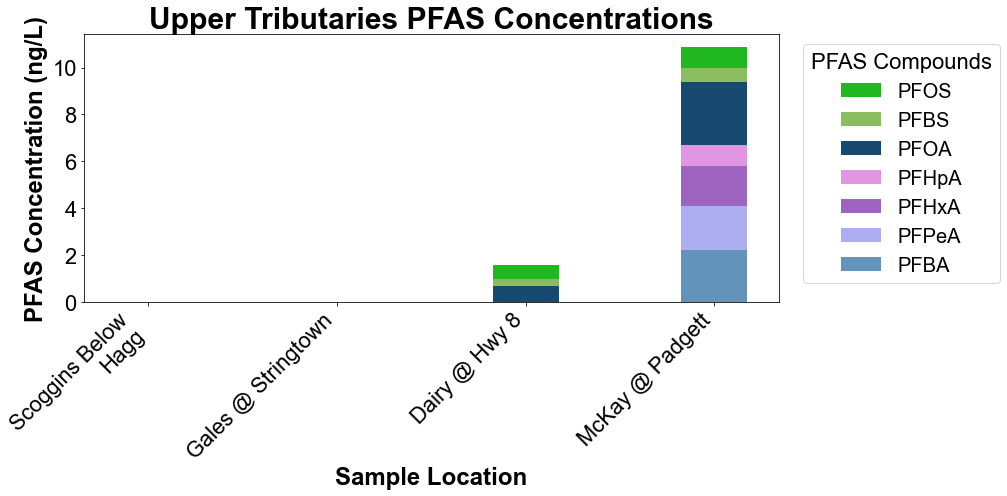

In [324]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(14, 7),title= 'Upper Tributaries PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

<ipython-input-298-41e2f10c6c10>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


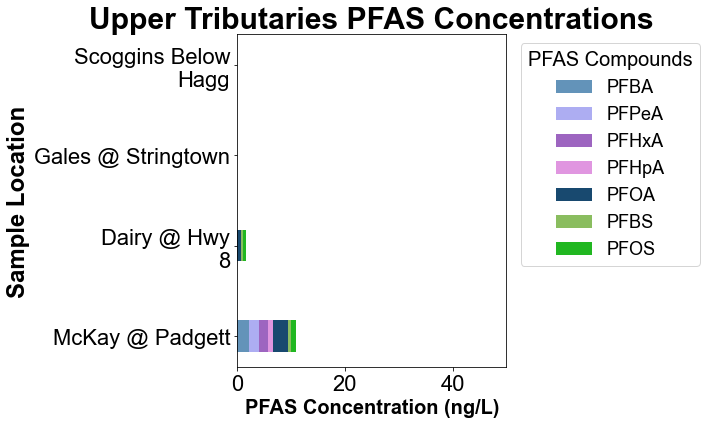

In [325]:
create_horizontal_stacked_bar_chart(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(10, 6),title='Upper Tributaries PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=24, axis_label_fontsize=20, tick_label_fontsize=20, legend_fontsize=18)

<ipython-input-291-bd444e0082d6>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


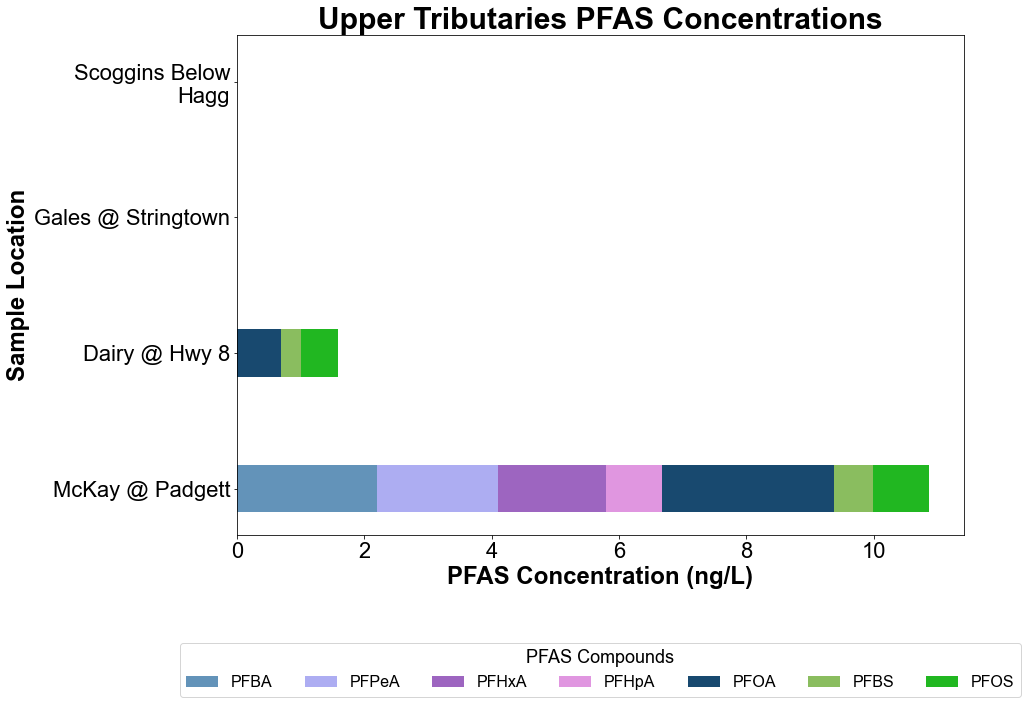

In [326]:
create_horizontal_stacked_bar_chart_with_legend_below(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 10),title='Upper Tributaries PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16)

### 6E) Lower Tributaries

In [327]:
# Lower Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']

rows_order= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']
rows_order_reverse=['Fanno @ Durham Rd','Durham Effluent','Chicken @ Sholls-Sherwood','Rock @ Brookwood', 'Rock Creek Effluent']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-02-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-03-28'

col_name='Quant Incl Estimates Incl Qual Flags'


In [328]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)
avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]

avg_pivot_table.index = avg_pivot_table.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')
#avg_pivot_table.index = avg_pivot_table.index.str.replace('Sholls-', 'Sholls- ')

avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,0,0,0,12.500,11.066667,13.283333,2.766667,7.10,3.316667,3.593333,...,0.156667,0,2.2,0,0.400,0,0.000,0,0,0
Rock @ Brookwood,0,0,0,4.000,5.000000,4.550000,2.050000,4.95,1.020000,0.760000,...,0.000000,0,0.0,0,0.185,0,0.000,0,0,0
Chicken @ Sholls-Sherwood,0,0,0,0.000,1.450000,1.250000,0.615000,1.40,0.550000,0.000000,...,0.000000,0,0.0,0,0.160,0,0.185,0,0,0
Durham Effluent,0,0,0,5.375,8.900000,9.800000,1.950000,7.05,0.850000,0.630000,...,0.000000,0,0.0,0,0.000,0,0.000,0,0,0
Fanno @ Durham Rd,0,0,0,3.800,6.000000,5.600000,2.750000,3.65,1.050000,1.030000,...,0.000000,0,0.0,0,0.190,0,0.000,0,0,0


In [329]:
Lower_PFASTotal=create_total_pfas_df(avg_pivot_table)
Lower_PFASTotal

,PFAS Total
Sample Location,
Rock Creek Effluent,93.521833
Rock @ Brookwood,38.305000
Chicken @ Sholls-Sherwood,8.640000
Durham Effluent,48.810000
Fanno @ Durham Rd,46.145000


<ipython-input-262-ce3676c347da>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45, ha='right')


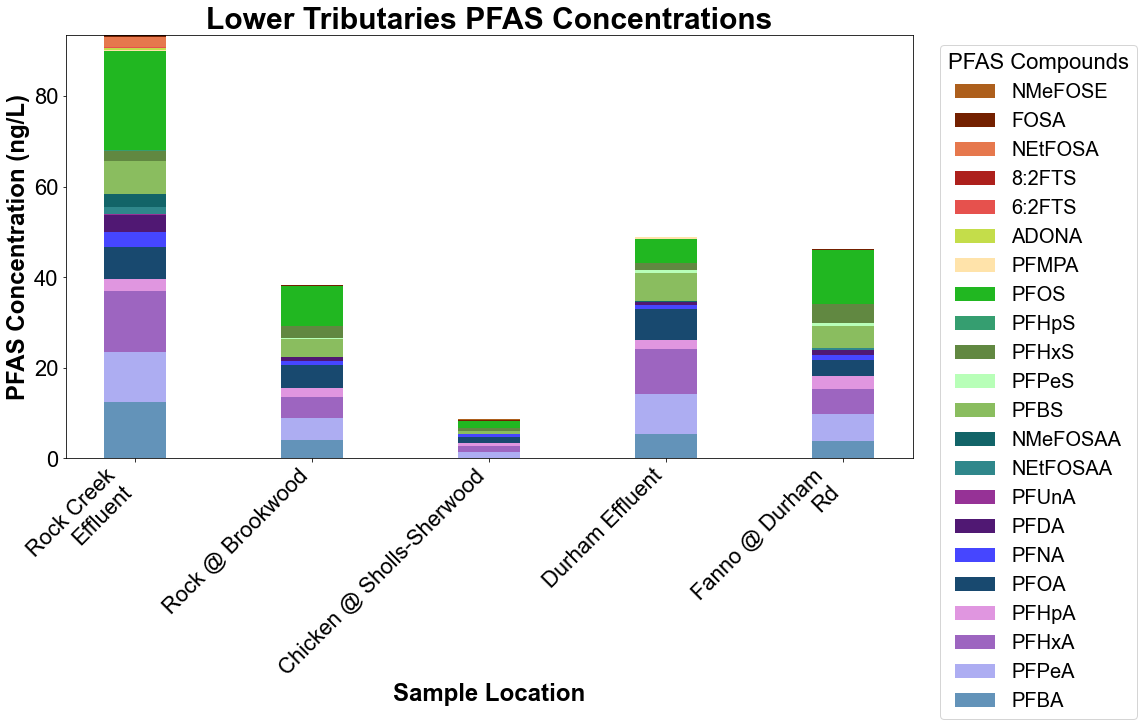

In [331]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(16, 10),title= 'Lower Tributaries PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

<ipython-input-298-41e2f10c6c10>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


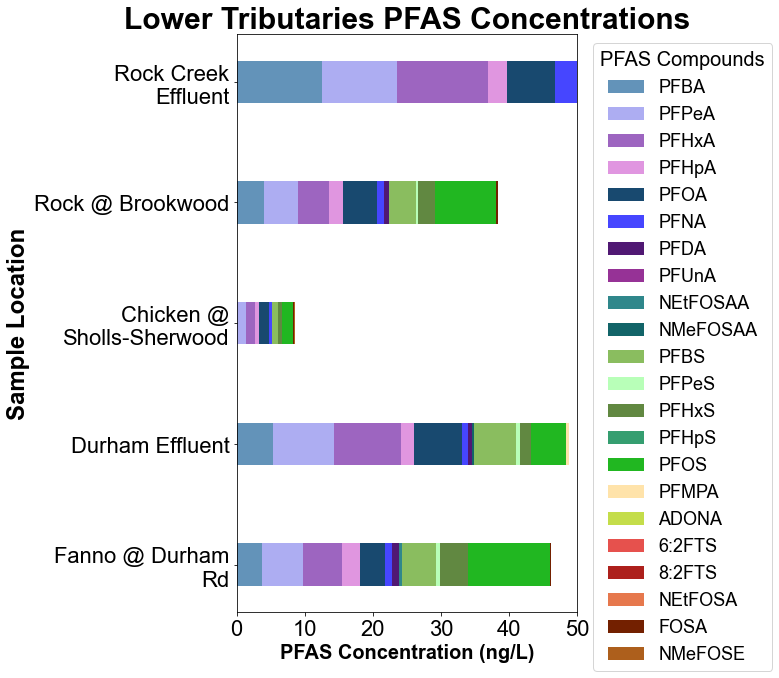

In [333]:
create_horizontal_stacked_bar_chart(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(11, 10),title='Lower Tributaries PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=24, axis_label_fontsize=20, tick_label_fontsize=20, legend_fontsize=18)

<ipython-input-291-bd444e0082d6>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


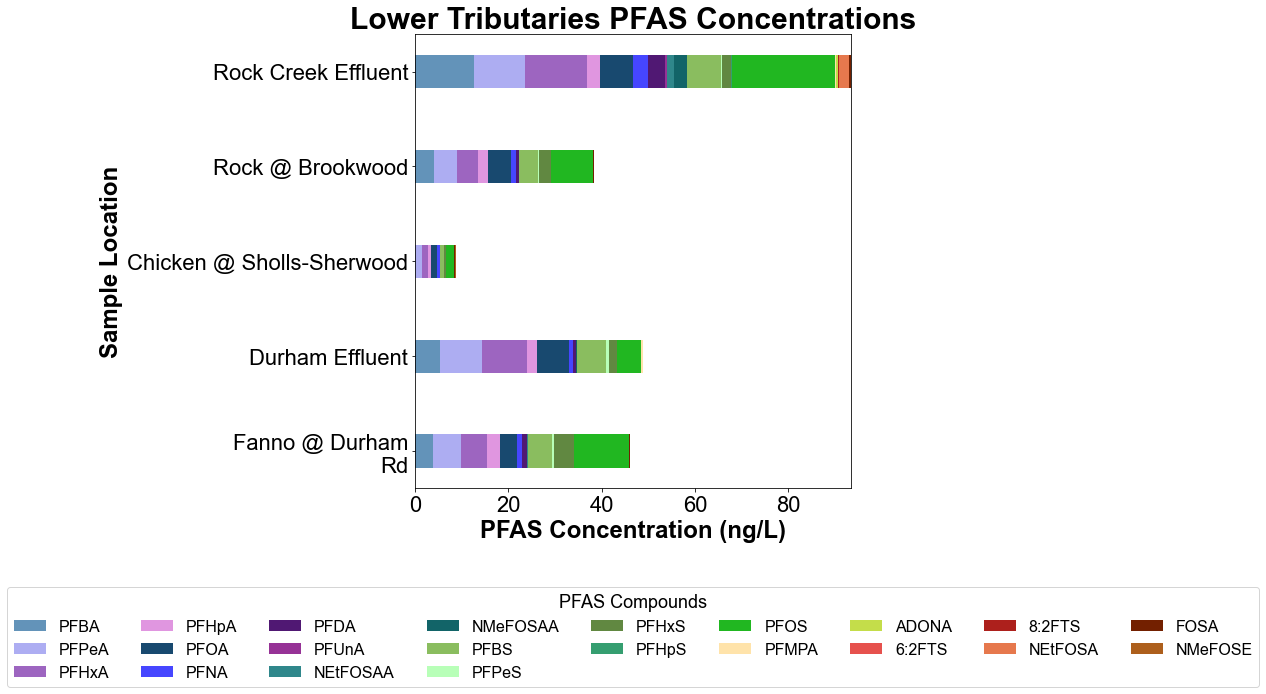

In [334]:
create_horizontal_stacked_bar_chart_with_legend_below(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 10),title='Lower Tributaries PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16)

In [ ]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'RockCreek': Rock_PFASTotal,
        'FannoCreek' : Fanno_PFASTotal,
        'Ambient': Ambient_PFASTotal,
        'UpperTributaries' : Upper_PFASTotal,
        'LowerTributaries': Lower_PFASTotal}

#filename: The name of the Excel file to write to.
filename= 'AllIncEstimates.xlsx'
dfs_to_excel(dfs, filename)

File 'AllIncEstimates.xlsx' has been written with 5 tabs.


### 6F) Urban Creeks

In [335]:
# Lower Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Beaverton @ Cornelius','Ash Creek @ Greenburg','Dawson @ Brookwood']

rows_order= ['Beaverton @ Cornelius','Ash Creek @ Greenburg','Dawson @ Brookwood']
rows_order_reverse=['Dawson @ Brookwood','Ash Creek @ Greenburg','Beaverton @ Cornelius']

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-02-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-28'

col_name='Quant Incl Estimates Incl Qual Flags'

In [336]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date, end_date=end_date,col_name=col_name)
avg_pivot_table = avg_pivot_table.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table = avg_pivot_table.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table = avg_pivot_table[filtered_order]

avg_pivot_table.index = avg_pivot_table.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table.index = avg_pivot_table.index.str.replace('Rock at', 'Rock @')
#avg_pivot_table.index = avg_pivot_table.index.str.replace('Sholls-', 'Sholls- ')



avg_pivot_table.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Beaverton @ Cornelius,0,0,0,5.2,6,6.0,2.8,7.6,1.40,0.73,...,0,0,0,0,0,0,0,0,0,0
Ash Creek @ Greenburg,0,0,0,3.7,5,3.7,1.7,6.7,0.79,0.69,...,0,0,0,0,0,0,0,0,0,0
Dawson @ Brookwood,0,0,0,14.0,8,6.7,2.5,4.3,1.10,0.70,...,0,0,0,0,0,0,0,0,0,0


In [337]:
UrbanCreeks_PFASTotal=create_total_pfas_df(avg_pivot_table)
UrbanCreeks_PFASTotal

,PFAS Total
Sample Location,
Beaverton @ Cornelius,51.76
Ash Creek @ Greenburg,41.68
Dawson @ Brookwood,53.87


<ipython-input-262-ce3676c347da>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45, ha='right')


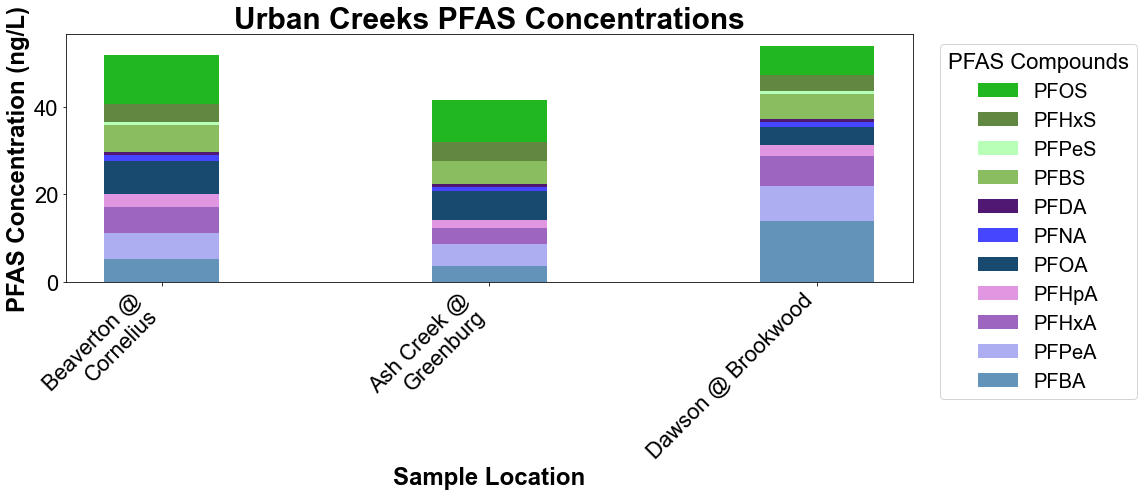

In [339]:
create_stacked_bar_chart_filtered(avg_pivot_table, std_dev_pivot_table=None, figsize=(16, 7),title= 'Urban Creeks PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

<ipython-input-298-41e2f10c6c10>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


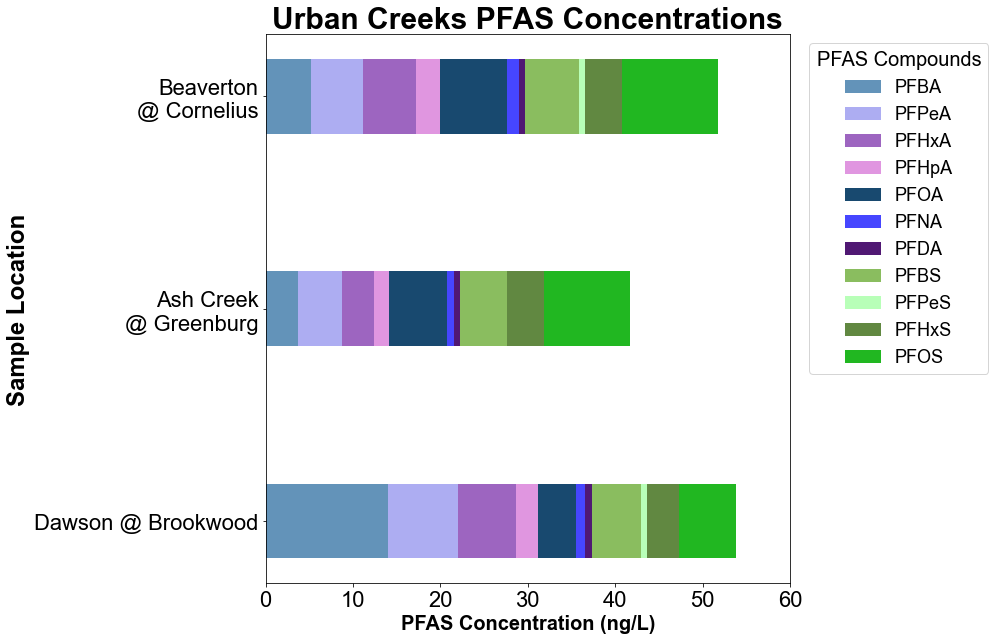

In [341]:
create_horizontal_stacked_bar_chart(avg_pivot_table.loc[rows_order_reverse], std_dev_pivot_table=None, figsize=(14, 9),title='Urban Creeks PFAS Concentrations', compound_colors_dict=compound_colors_dict_abbrev,
                                  title_fontsize=24, axis_label_fontsize=20, tick_label_fontsize=20, legend_fontsize=18,xlim=60)

### 19) Ambient Relationships

#### 19.1) Functions

In [342]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values='Quant Incl Estimates Incl Qual Flags',
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [343]:
def plot_correlation_heatmap(data_df, fig_size=(12,12)):
    """
    Plot a heatmap of the Pearson correlation coefficients of a DataFrame.

    Args:
        data_df (pd.DataFrame): The input dataframe with numerical attributes.
        fig_size (tuple): The size of the figure (width, height).
    """
    # Calculate the Pearson correlation coefficients
    correlation_matrix = data_df.corr()

    # Create the heatmap
    plt.figure(figsize=fig_size)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

    # Add titles and labels as needed
    plt.title('Pearson Correlation Heatmap')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')

    # Show the plot
    plt.show()




In [344]:
def plot_scatter(data_df, column_x, column_y, fig_size=(10, 8), 
                 title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14):
    """
    Create a scatter plot for two specified columns from a DataFrame with enhanced styling and
    statistical annotations.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        column_x (str): The name of the column for the x-axis.
        column_y (str): The name of the column for the y-axis.
        fig_size (tuple): The size of the figure (width, height).
        title_fontsize (int): Font size for the chart title.
        axis_label_fontsize (int): Font size for the axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
    """
    font_bold = FontProperties(family='Arial', weight='bold')
    
    fig, ax = plt.subplots(figsize=fig_size)
    scatter = ax.scatter(data_df[column_x]*100, data_df[column_y])

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_df[column_x]*100, data_df[column_y])
    r_squared = r_value**2

    # Adding linear regression line to the scatter plot
    ax.plot(data_df[column_x]*100, intercept + slope * data_df[column_x]*100, color='red')

    # Adding titles and labels with custom fonts
    ax.set_title(f'Scatter Plot of {column_x} vs {column_y}', fontsize=title_fontsize, fontproperties=font_bold)
    ax.set_xlabel(column_x, fontsize=axis_label_fontsize, fontproperties=font_bold)
    ax.set_ylabel(column_y, fontsize=axis_label_fontsize, fontproperties=font_bold)

    # Annotation for R-squared and p-value
    ax.annotate(f'R² = {r_squared:.3f}\np-value = {p_value:.3g}', xy=(0.05, 0.95), xycoords='axes fraction',
                verticalalignment='top', horizontalalignment='left', 
                fontsize=22, bbox=dict(boxstyle="round, pad=0.3", edgecolor='red', facecolor='yellow', alpha=0.5))


    # Setting tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

    plt.tight_layout()
    plt.show()



#### 19.2) Filters and Settings

In [345]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','','Probably ok','probably ok']
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-06-30'

start_date='2024-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient']
#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter=ambient_compounds
#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter =ambient_locations

#### 19.3) Create Pivot Table for Average Quant Incl Estimates Incl Qual Flags

In [346]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'

pivot_table=create_filtered_pivot_table(data_df=data_df, qual_summary_filter=qual_summary_filter, start_date=start_date, end_date=end_date, type_filter=type_filter,
                                         pfas_compound_filter=pfas_compound_filter, sample_location_filter=sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table.index = pivot_table.index.map(pfas_mapping)

pivot_table=pivot_table.transpose().reset_index(level=0, drop=True)

# Add a column to sum all PFAS concentrations per location
pivot_table['PFAS Total'] = pivot_table.sum(axis=1)
pivot_table



PFAS Compound,10:2FTS,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,...,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA,PFAS Total
Sample Location,,,,,,,,,,,,,,,,,,,,,
Beaverton @ Cornelius,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.000000,11.000000,7.600000,0.730000,6.000000,0.0,0.0,0.0,51.760000
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.106667,1.466667,1.433333,0.000000,0.966667,0.0,0.0,0.0,8.060000
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.103333,0.816667,0.856667,0.000000,0.226667,0.0,0.0,0.0,2.576667
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.095000,11.475000,5.600000,0.572500,5.650000,0.0,0.0,0.0,46.027500
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.120000,0.000000,0.113333,0.000000,0.000000,0.0,0.0,0.0,0.233333
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.116667,1.160000,2.533333,0.000000,1.733333,0.0,0.0,0.0,11.563333
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.123333,8.500000,4.933333,0.126667,4.866667,0.0,0.0,0.0,37.190000
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.106667,2.200000,1.866667,0.000000,2.300000,0.0,0.0,0.0,14.730000


In [347]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-06-01'

#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2023-06-30'
pivot_table_2023=create_filtered_pivot_table(data_df=data_df_2023, qual_summary_filter=qual_summary_filter, start_date=start_date, end_date=end_date, type_filter=type_filter,
                                         pfas_compound_filter=pfas_compound_filter, sample_location_filter=sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table_2023.index = pivot_table_2023.index.map(pfas_mapping)

pivot_table_2023=pivot_table_2023.transpose().reset_index(level=0, drop=True)

# Add a column to sum all PFAS concentrations per location
pivot_table_2023['PFAS Total'] = pivot_table_2023.sum(axis=1)

#pivot_table_2023.index = pivot_table_2023.index.map(lambda x: str(x) + '_2023')
pivot_table_2023


PFAS Compound,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,PFODA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA,PFAS Total
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.32,1.60,1.20,0.00,1.50,0.0,0.0,0.0,8.21
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.31,0.99,0.88,0.00,0.68,0.0,0.0,0.0,3.98
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.38,14.00,7.30,0.58,6.20,0.0,0.0,0.0,54.36
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.36,0.00,0.34,0.00,0.00,0.0,0.0,0.0,0.70
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.35,1.50,2.10,0.00,2.00,0.0,0.0,0.0,12.62
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.37,9.70,5.00,0.38,5.90,0.0,0.0,0.0,42.95
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.32,2.70,2.40,0.00,3.40,0.0,0.0,0.0,22.59
TR @ Cherry Grove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.47,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.72


In [348]:
start_date='2024-01-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'
pivot_table_2024=create_filtered_pivot_table(data_df=data_df, qual_summary_filter=qual_summary_filter, start_date=start_date, end_date=end_date, type_filter=type_filter,
                                         pfas_compound_filter=pfas_compound_filter, sample_location_filter=sample_location_filter)

# Rename the index of data_df using the mapping (No need to change)
pivot_table_2024.index = pivot_table_2024.index.map(pfas_mapping)

pivot_table_2024=pivot_table_2024.transpose().reset_index(level=0, drop=True)

# Add a column to sum all PFAS concentrations per location
pivot_table_2024['PFAS Total'] = pivot_table_2024.sum(axis=1)

#pivot_table_2024.index = pivot_table_2024.index.map(lambda x: str(x) + '_2024')
pivot_table_2024


PFAS Compound,11Cl-PF3OUdS,3:3FTCA,4:2FTS,5:3FTCA,6:2FTS,7:3FTCA,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,...,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFTeDA,PFTrDA,PFUnA,PFAS Total
Sample Location,,,,,,,,,,,,,,,,,,,,,
Beaverton @ Cornelius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.400,0.0,11.000000,7.600000,0.73,6.000000,0.0,0.0,0.0,51.760
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.150,0.0,1.400000,1.550000,0.00,0.700000,0.0,0.0,0.0,7.985
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.730000,0.845000,0.00,0.000000,0.0,0.0,0.0,1.875
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.030,0.0,10.633333,5.033333,0.57,5.466667,0.0,0.0,0.0,43.250
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.990000,2.750000,0.00,1.600000,0.0,0.0,0.0,11.035
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.035,0.0,7.900000,4.900000,0.00,4.350000,0.0,0.0,0.0,34.310
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,1.950000,1.600000,0.00,1.750000,0.0,0.0,0.0,10.800


In [349]:
# Concatenate the DataFrames
pivot_table = pd.concat([pivot_table_2023, pivot_table_2024], ignore_index=False)
pivot_table

PFAS Compound,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,PFTrDA,PFUnA,PFAS Total,3:3FTCA,5:3FTCA,7:3FTCA,NFDHA,PFEESA,PFMBA,PFMPA
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,8.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,3.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,54.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,12.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rock @ Brookwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,42.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scoggins Below Hagg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR @ Boones Ferry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,22.590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR @ Cherry Grove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 19.4) Import Sample Sites Data

In [350]:
# Example usage:

#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Old Databases and Spreadsheets/Database as of 11-27-2023 w Plots for ACWA Toxics.xlsm'
#Specify sheet name
sheet_name = 'June 2023 Ambient Flows'

#Call data import function
sites_df = read_excel_sheet(excel_file_path, sheet_name)

#drop multiple columns by name
sites_df.drop(['Unnamed: 0', 'June 2023 Flow (cfs)','Source Notes'], axis=1, inplace=True)

# setting 	WRRF Effluents for Ambient as index column
sites_df.set_index("WRRF Effluents for Ambient", inplace = True)
sites_df.head()

,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
WRRF Effluents for Ambient,,,,,,,,,,,
TR @ Cherry Grove,25461.924347,21549.382949,3661.284345,251.257053,477.086571,0.846338,0.143794,0.009868,0.018737,NaN,NaN
Scoggins Below Hagg,4951.660999,3194.021900,1547.320000,210.319099,211.557982,0.645041,0.312485,0.042474,0.042725,NaN,NaN
Gales @ Stringtown,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
TR @ Fernhill,136872.565188,98254.411496,34653.435124,3964.718568,3537.833545,0.717853,0.253180,0.028966,0.025848,NaN,Scoggins + Gales
Forest Grove Effluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 19.5) Merge PFAS Compound Concentrations and Sample Locations Information based on Sample Locations

In [351]:
# Merge dataframes
merged_df = pd.merge(pivot_table, sites_df, left_index=True, right_index=True, how='inner')
merged_df

,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp,Upstream WRRFs,Upstream Tribs
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Chicken @ Sholls-Sherwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630,NaN,NaN
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Dairy @ Hwy 8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002,NaN,NaN
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499,Rock Creek WRRF + Durham WRRF,NaN
Fanno at Durham Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,...,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499,Rock Creek WRRF + Durham WRRF,NaN
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
Gales @ Stringtown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694,NaN,NaN
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,19516.486731,16212.526740,3585.069093,2339.552083,0.496425,0.412385,0.091190,0.059509,NaN,NaN


In [352]:
merged_df.drop(['Upstream WRRFs','Upstream Tribs'], axis=1, inplace=True)
merged_df

,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,PFMPA,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp
Sample Location,,,,,,,,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,9543.975481,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630
Chicken @ Sholls-Sherwood,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,9543.975481,3200.882770,4382.362286,1960.730425,1046.303633,0.335383,0.459176,0.205442,0.109630
Dairy @ Hwy 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,138482.653259,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002
Dairy @ Hwy 8,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,138482.653259,77938.000606,52950.005912,7594.646741,5401.105391,0.562800,0.382358,0.054842,0.039002
Fanno at Durham Rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,17896.245093,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499
Fanno at Durham Rd,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,...,0.0,17896.245093,1147.827057,2320.390903,14428.027133,7274.806762,0.064138,0.129658,0.806204,0.406499
Gales @ Stringtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694
Gales @ Stringtown,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,43724.166616,36137.866805,7085.507520,500.792292,773.669939,0.826496,0.162050,0.011453,0.017694
McKay @ Padgett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,39314.082565,19516.486731,16212.526740,3585.069093,2339.552083,0.496425,0.412385,0.091190,0.059509


In [353]:
merged_df.index

Index(['Chicken @ Sholls-Sherwood', 'Chicken @ Sholls-Sherwood',
       'Dairy @ Hwy 8', 'Dairy @ Hwy 8', 'Fanno at Durham Rd',
       'Fanno at Durham Rd', 'Gales @ Stringtown', 'Gales @ Stringtown',
       'McKay @ Padgett', 'McKay @ Padgett', 'Rock @ Brookwood',
       'Rock @ Brookwood', 'Scoggins Below Hagg', 'Scoggins Below Hagg',
       'TR @ Boones Ferry', 'TR @ Boones Ferry', 'TR @ Cherry Grove',
       'TR @ Cherry Grove', 'TR @ Farmington', 'TR @ Farmington',
       'TR @ Fernhill', 'TR @ Fernhill', 'TR @ Golf Course',
       'TR @ Golf Course', 'TR @ Jurgens', 'TR @ Jurgens', 'TR @ Rood Br',
       'TR @ Rood Br'],
      dtype='object', name='Sample Location')

#### 19.6 Create Correlation Matrix

c:\Users\rodriguezc\Anaconda3\lib\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


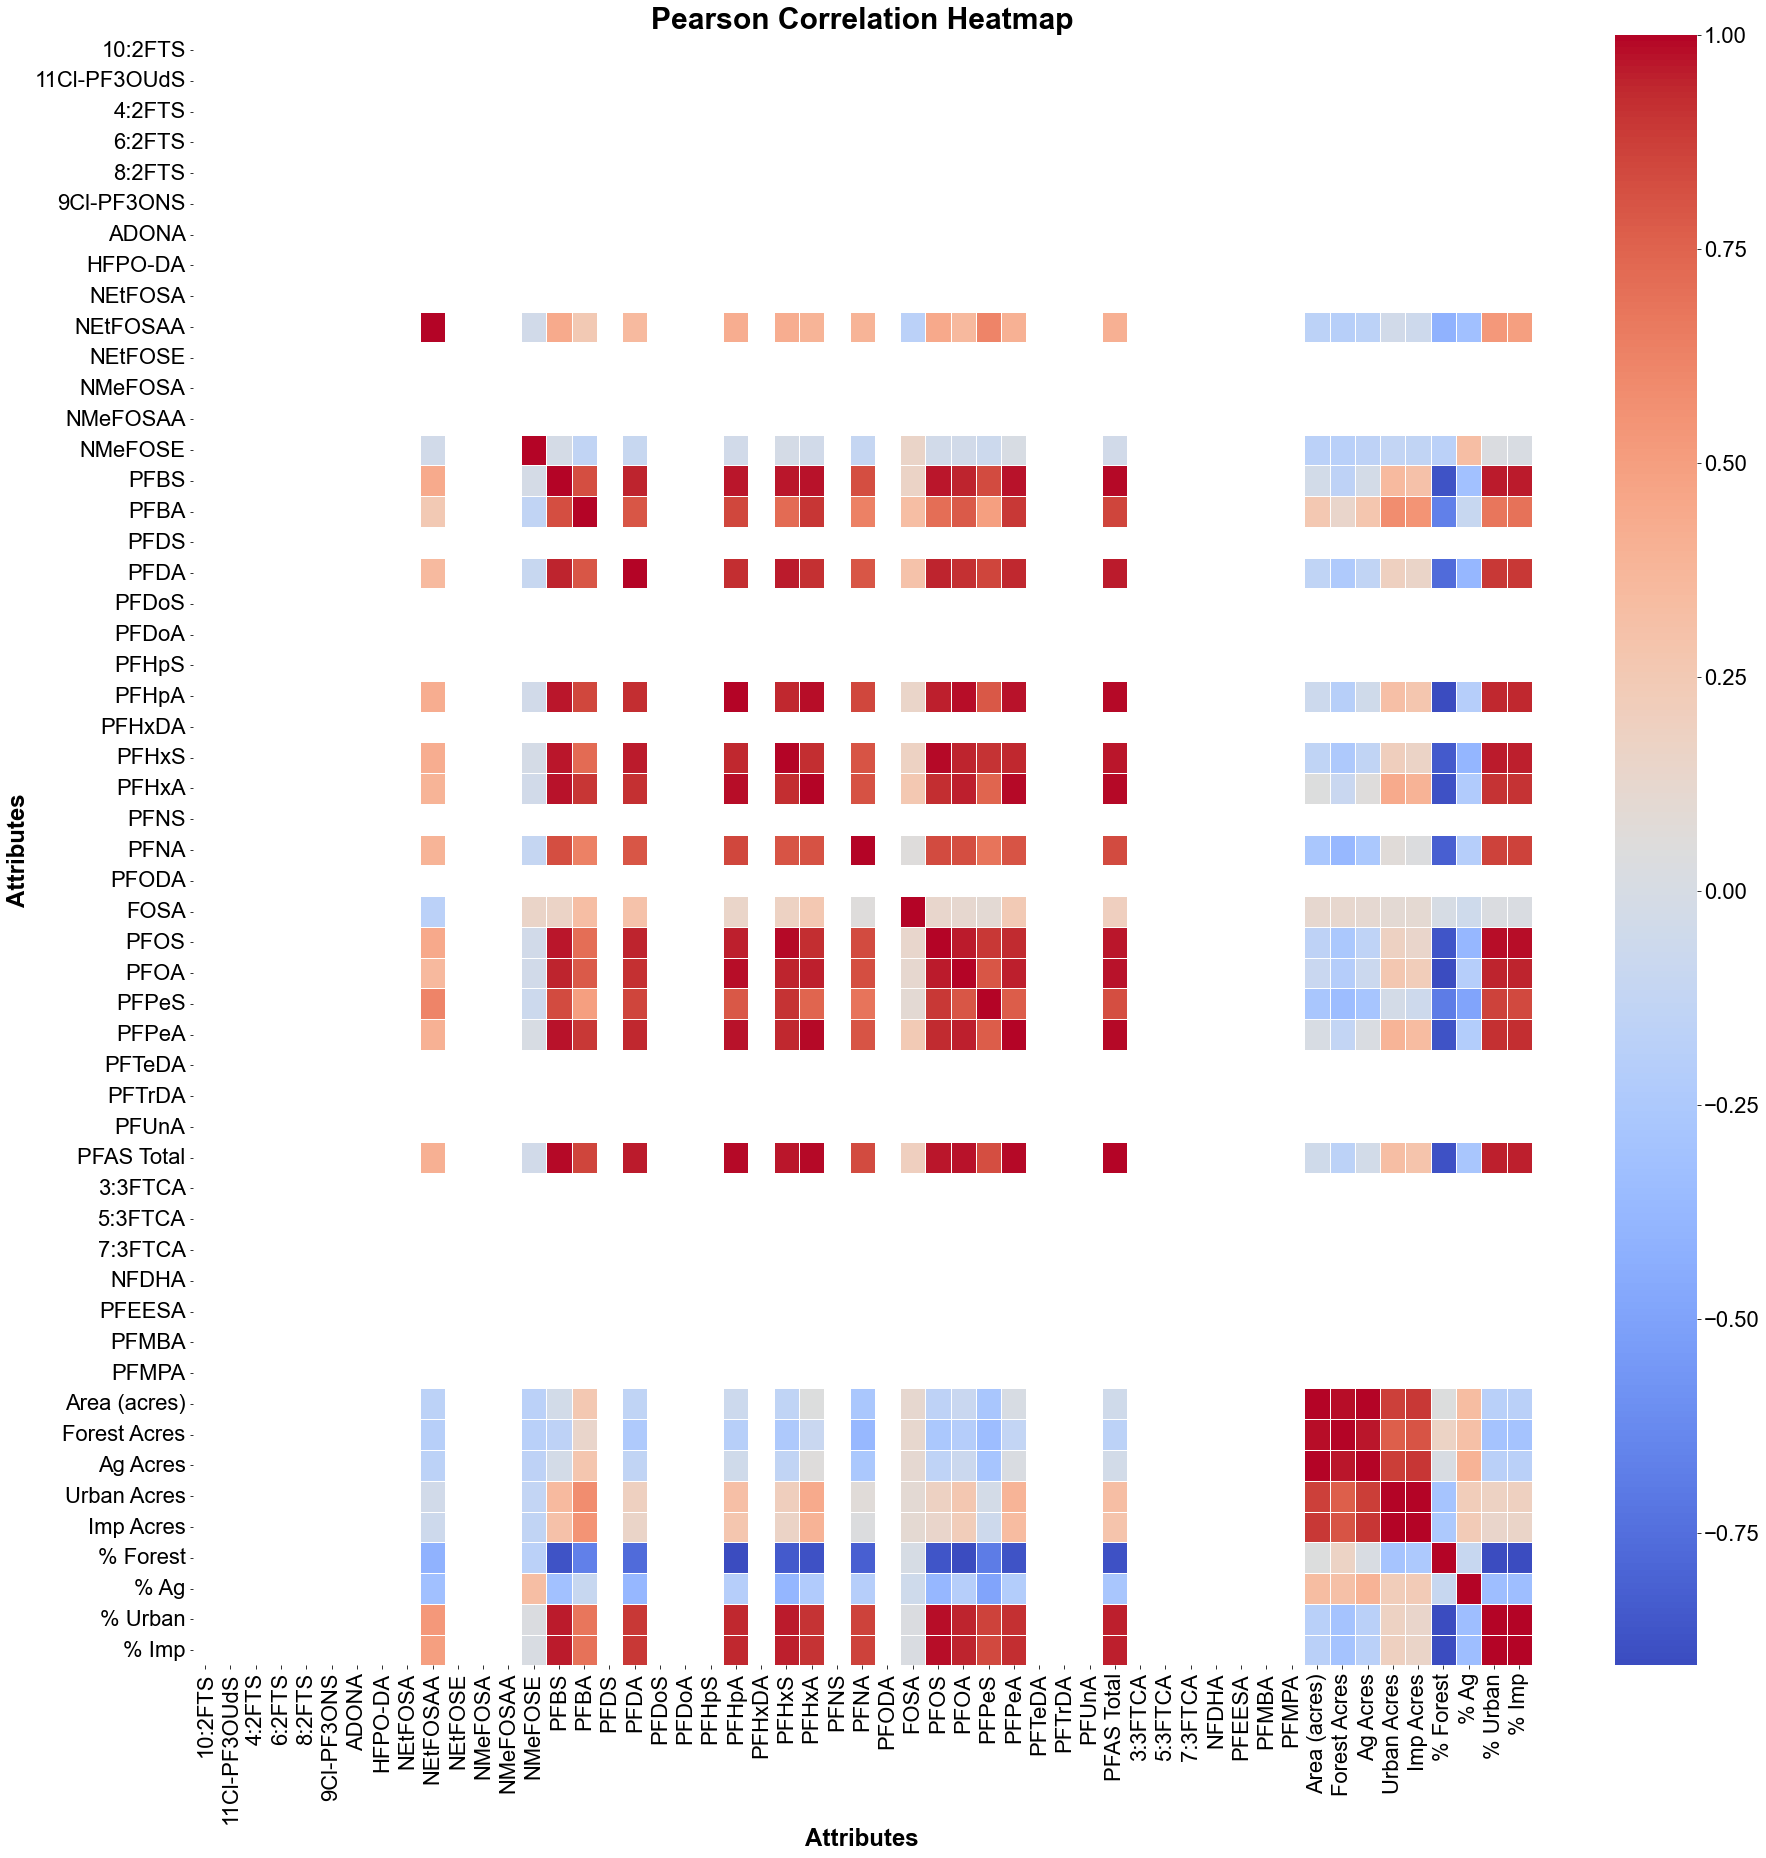

In [354]:
corr_map=plot_correlation_heatmap(merged_df, fig_size=(30,30))
corr_map

In [200]:
merged_df.corr()

,10:2FTS,11Cl-PF3OUdS,4:2FTS,6:2FTS,8:2FTS,9Cl-PF3ONS,ADONA,HFPO-DA,NEtFOSA,NEtFOSAA,...,PFMPA,Area (acres),Forest Acres,Ag Acres,Urban Acres,Imp Acres,% Forest,% Ag,% Urban,% Imp
10:2FTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11Cl-PF3OUdS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4:2FTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6:2FTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8:2FTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9Cl-PF3ONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADONA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HFPO-DA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEtFOSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEtFOSAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,-0.167031,-0.198032,-0.165466,-0.039482,-0.062085,-0.413774,-0.319151,0.527428,0.498984


#### 19.7 Create Scatter Plot to See Relationship

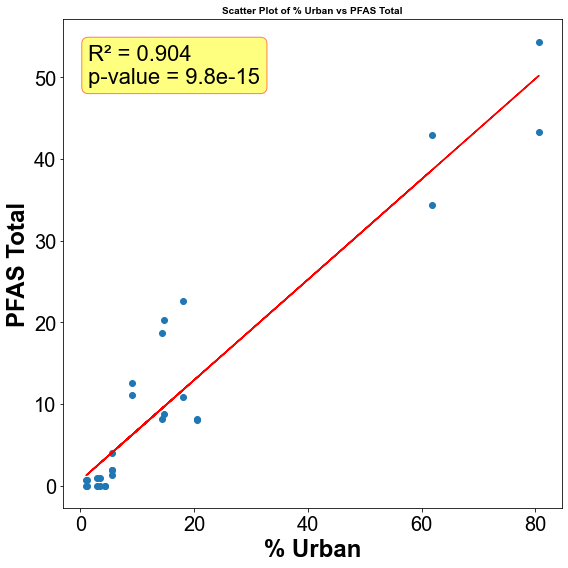

In [201]:
plot_scatter(merged_df,  '% Urban','PFAS Total',fig_size=(8,8),title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20)

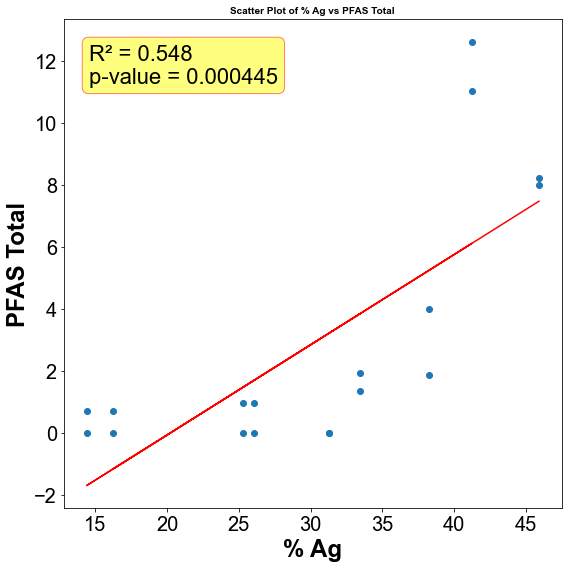

In [202]:
plot_scatter(merged_df.loc[['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Gales @ Stringtown', 'McKay @ Padgett','Scoggins Below Hagg', 'TR @ Cherry Grove',
               'TR @ Fernhill', 'TR @ Golf Course','TR @ Rood Br']],  '% Ag','PFAS Total',fig_size=(8,8),title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20)

#### 19.8 Export Tables

In [ ]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'Correlation': merged_df.corr()}

#filename: The name of the Excel file to write to.
filename= 'Correlation_QuantQual.xlsx'
dfs_to_excel(dfs, filename)

File 'Correlation_QuantQual.xlsx' has been written with 1 tabs.


### Wet vs Dry Season

#### Prepare Data

In [403]:
filter_Sample_Locations = ['Fanno @ SW 56th Ave','Fanno @ Bohmann','Ash Creek @ Greenburg','Fanno @ SW North Dakota St','Fanno @ SW Bonita Rd','Rock @ NW Old Cornelius Pass Rd',
                           'Rock @ NW Rock Creek Blvd','Rock @ NE Cornelius Pass Rd','Rock @ East Main St','Dawson @ Brookwood','Rock @ River Rd','Fanno @ Durham Park',
                           'Fanno @ SW Grant Ave','Rock @ Brookwood','Beaverton @ Cornelius','Dairy @ Hwy 8','Chicken @ Sholls-Sherwood','Scoggins Below Hagg','Gales @ Stringtown',
                           'McKay @ Padgett','TR @ Cherry Grove','TR @ Golf Course','TR @ Farmington','Fanno at Durham Rd','TR @ Jurgens','TR @ Fernhill','TR @ Boones Ferry',
                           'TR @ Rood Br','Durham Effluent','Rock Creek Effluent']

In [404]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date='2023-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-04-30'
data_df = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date) 
                  & (data_df['Analysis'] == 'PFAS-CL')]

In [405]:
# Define the values you want to filter by
filter_values_wet = ['Urban Creek PFAS Monitoring', 'Ambi PFAS Monitoring']

data_RCEffluent_wet = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024')]
data_DurhamEffluent_wet = data_df[(data_df['Sample Location'] == 'Durham Effluent') & (data_df['Analysis Method'] == 1633) & (data_df['Sample Date'] == '03/12/2024')]
# Filter the DataFrame
start_date='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date='2024-03-30'
data_df_wet = data_df[data_df['Sample Name'].isin(filter_values_wet)  & (data_df['Sample Date'] >= start_date) & (data_df['Sample Date'] <= end_date)]
data_df_wet=pd.concat([data_df_wet, data_RCEffluent_wet, data_DurhamEffluent_wet])


data_df_wet=data_df_wet[data_df_wet['Sample Location'].isin(filter_Sample_Locations)& (data_df['Analysis'] == 'PFAS-CL')]

<ipython-input-405-b53e5aafabf2>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_df_wet=data_df_wet[data_df_wet['Sample Location'].isin(filter_Sample_Locations)& (data_df['Analysis'] == 'PFAS-CL')]


In [406]:
data_df_wet['Sample Date'].unique()

<DatetimeArray>
['2024-02-19 00:00:00', '2024-02-20 00:00:00', '2024-02-21 00:00:00',
 '2024-03-12 00:00:00']
Length: 4, dtype: datetime64[ns]

In [407]:
#Dataset for June 2023 Ambient PFAS Sampling
# Define the values you want to filter by
filter_values_dry = ['Ambient PFAS Project #318']
#Get Effluent data
data_RCEffluent_dry_April = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent')  & (data_df['Sample Date'] == '04/06/2023')]
data_DurhamEffluent_dry_April = data_df[(data_df['Sample Location'] == 'Durham Effluent')  & (data_df['Sample Date'] == '04/06/2023')]
data_RCEffluent_dry_Sep = data_df[(data_df['Sample Location'] == 'Rock Creek Effluent')  & (data_df['Sample Date'] == '09/11/2023')]
data_DurhamEffluent_dry_Sep = data_df[(data_df['Sample Location'] == 'Durham Effluent')  & (data_df['Sample Date'] == '09/11/2023')]
# Filter the DataFrame
data_df_dry = data_df[data_df['Sample Name'].isin(filter_values_dry)]
data_df_dry=pd.concat([data_df_dry, data_RCEffluent_dry_April, data_DurhamEffluent_dry_April,data_RCEffluent_dry_Sep,data_DurhamEffluent_dry_Sep])

data_df_dry=data_df_dry[data_df_dry['Sample Location'].isin(filter_Sample_Locations)& (data_df['Analysis'] == 'PFAS-CL')]
data_df_dry['Sample Date'].unique()


<ipython-input-407-bddaf69f2527>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_df_dry=data_df_dry[data_df_dry['Sample Location'].isin(filter_Sample_Locations)& (data_df['Analysis'] == 'PFAS-CL')]


<DatetimeArray>
['2023-06-06 00:00:00', '2023-06-07 00:00:00', '2023-04-06 00:00:00',
 '2023-09-11 00:00:00']
Length: 4, dtype: datetime64[ns]

In [408]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_WetToDry='2024-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_WetToDry='2024-04-30'
data_df_WetToDry = data_df[data_df['Sample Location'].isin(filter_Sample_Locations) & (data_df['Sample Date'] >= start_date_WetToDry) & (data_df['Sample Date'] <= end_date_WetToDry) 
                  & (data_df['Analysis'] == 'PFAS-CL')&(data_df['Sample Name'] != 'Thomas Dairy Tracer Study') ]

data_df_WetToDry=pd.concat([data_df_WetToDry,data_DurhamEffluent_Apr2023, data_RCEffluent_Apr2023])

In [409]:
data_df_WetToDry['Sample Date'].unique()

<DatetimeArray>
['2024-04-15 00:00:00', '2024-04-16 00:00:00', '2024-04-17 00:00:00',
 '2023-04-06 00:00:00']
Length: 4, dtype: datetime64[ns]

#### Define Functions

In [410]:
def PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df, filter_qual_summary=None, filter_pfas_compound=None,
                              filter_sample_location=None, start_date=None, end_date=None,col_name= 'Quant Incl Estimates Incl Qual Flags'):
    """
    Create a custom pivot table with filters based on 'Qual Summary (Grade for filtering)', 'PFAS Compound',
    'Sample Location', and a date range for 'Sample Date'.

    Args:
        data_df (pd.DataFrame): The DataFrame containing the data.
        filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
        filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
        filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
        start_date (str, optional): Start date for the date range filter (default is None).
        end_date (str, optional): End date for the date range filter (default is None).

    Returns:
        pd.DataFrame: The custom pivot table.
    """
    try:
        # Apply filters based on 'Qual Summary (Grade for filtering)'
        filtered_data = data_df
        if filter_qual_summary:
            filtered_data = filtered_data[filtered_data['Qual Summary (Grade for filtering)'].isin(filter_qual_summary)]

        # Apply filters based on 'PFAS Compound'
        if len(filter_pfas_compound) > 0:
            filtered_data = filtered_data[filtered_data['PFAS Compound'].isin(filter_pfas_compound)]

        # Apply filters based on 'Sample Location'
        if len(filter_sample_location) >0:
            filtered_data = filtered_data[filtered_data['Sample Location'].isin(filter_sample_location)]

        # Apply date range filter based on 'Sample Date'
        if start_date and end_date:
            filtered_data = filtered_data[(filtered_data['Sample Date'] >= start_date) & (filtered_data['Sample Date'] <= end_date)]

        # Create a pivot table with 'Sample Location' as rows, 'PFAS Compound' as columns, and average of 'Quant Incl Estimates Incl Qual Flags' as values
        pivot_table = pd.pivot_table(filtered_data, values=col_name,
                                     index='Sample Location', columns='PFAS Compound', aggfunc='mean', fill_value=0)

        return pivot_table

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None


In [411]:
def split_label(label):
        if len(label) > 10:
            split_point = label.find(' ', 10)  # Find next space after 14th character
            if split_point != -1:
                return label[:split_point] + '\n' + label[split_point + 1:]
        return label  # Return label unmodified if it's short enough or no space found

In [430]:
def create_seasonal_stacked_bar_chart(season_1_data, season_2_data, season_3_data, figsize=(12, 8), title='Seasonal PFAS Concentrations by Sample Location', compound_colors_dict=None,
                                      title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12, bar_width=0.35, rows_order=[]):
    try:
        font_bold = FontProperties(family='Arial', weight='bold')
        
        # Convert zeros to NaNs to avoid plotting zero-height bars
        season_1_data = season_1_data.replace(0, np.nan)
        season_2_data = season_2_data.replace(0, np.nan)
        season_3_data = season_3_data.replace(0, np.nan)
        
        # Prepare figure and axes
        fig, ax = plt.subplots(figsize=figsize)
        locations = set(season_1_data.index).union(season_2_data.index).union(season_3_data.index)
        locations = sorted(locations, key=lambda x: rows_order.index(x) if x in rows_order else len(rows_order))
        
        # Position indices for the bars, adjusted to include gaps and three seasons
        x_indices = np.arange(len(locations))
        gap = 0.02  # This is the gap between bars
        adjusted_width = (bar_width - 2 * gap) / 3  # Adjust bar width to accommodate three bars
        
        season_bottoms = [{loc: 0 for loc in locations} for _ in range(3)]  # Tracking bottoms for each bar stack in three seasons
        legend_entries = {}  # Dictionary to manage legend entries

        # Iterate through each compound defined in the color dictionary
        for compound in compound_colors_dict:
            color = compound_colors_dict[compound]
            for i, season_data in enumerate([season_1_data, season_2_data, season_3_data]):
                heights = [season_data.at[loc, compound] if compound in season_data.columns and pd.notna(season_data.at[loc, compound]) else 0 for loc in locations]
                # Plot bars for each season with adjusted positions
                bars = ax.bar(x_indices + i * (adjusted_width + gap) - bar_width / 2, heights, width=adjusted_width,
                       bottom=[season_bottoms[i][loc] for loc in locations], color=color, align='edge')
                # Update bottom heights for stacking
                season_bottoms[i] = {loc: season_bottoms[i][loc] + height for loc, height in zip(locations, heights)}
                # Manage legend entries
                if compound not in legend_entries and any(heights):
                    legend_entries[compound] = bars[0]  # Use the first bar artist as the legend handle for this compound

        # Calculate the maximum stack height for setting y-axis limits
        max_stack_height = max(max(bottoms.values()) for bottoms in season_bottoms)
        ax.set_ylim(0, max_stack_height * 1.10 if max_stack_height > 0 else 1)  # Adjusting y-axis

        ax.set_xticks(x_indices)
        ax.set_xticklabels([split_label(label) for label in locations], rotation=45, ha='right', fontsize=tick_label_fontsize)
        ax.set_xlabel('Sample Location', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_ylabel('PFAS Concentration (ng/L)', fontsize=axis_label_fontsize, fontproperties=font_bold)
        ax.set_title(title)

        # Set the legend using the managed entries
        ax.legend(legend_entries.values(), legend_entries.keys(), title='PFAS Compounds', loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=8, fontsize=legend_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


In [413]:
def align_dataframes(df_list):
    """ Ensure all dataframes in the list have the same columns by adding dummy columns with 0s where needed. """
    # Union all columns from all dataframes
    all_columns = sorted(set.union(*(set(df.columns) for df in df_list)))
    
    # Add missing columns with default values of 0
    for df in df_list:
        missing_cols = set(all_columns) - set(df.columns)
        for col in missing_cols:
            df[col] = 0  # Add missing columns with 0s
    
    # Reorder all columns to match the union of all columns
    for i in range(len(df_list)):
        df_list[i] = df_list[i][all_columns]
        
    return df_list

#### Define Seasons

In [414]:
# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_wet='2024-02-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_wet='2024-03-13'

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_dry='2023-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_dry='2023-09-13'

# Specify start_date (str, optional): Start date for the date range filter (default is None).
start_date_WetToDry='2023-04-01'
#Specify end_date (str, optional): End date for the date range filter (default is None).
end_date_WetToDry='2024-04-18'

#### For Ambient Locations (Tualatin River)

In [397]:
# All Ambient Locations

# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']

#For 2024 Data

rows_order= ['TR @ Cherry Grove','TR @ Fernhill','TR @ Golf Course','TR @ Rood Br',
             'TR @ Farmington','TR @ Jurgens','TR @ Boones Ferry']
rows_order_reverse=['TR @ Boones Ferry','TR @ Jurgens','TR @ Farmington',
                    'TR @ Rood Br','TR @ Golf Course','TR @ Fernhill',
                   'TR @ Cherry Grove' ]

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [418]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)
avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0.0,0.00,0.25,0.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0.47,0,0,0,0
TR @ Fernhill,0.0,0.00,0.22,0.00,0.34,0.00,0.00,0,0,0,...,0,0,0,0,0,0.39,0,0,0,0
TR @ Golf Course,0.0,0.00,0.23,0.00,0.35,0.00,0.00,0,0,0,...,0,0,0,0,0,0.38,0,0,0,0
TR @ Rood Br,0.0,0.41,0.36,0.00,0.58,0.00,0.00,0,0,0,...,0,0,0,0,0,0.38,0,0,0,0
TR @ Farmington,4.5,2.60,2.80,1.10,1.70,0.26,0.34,0,0,0,...,0,0,0,0,0,0.51,0,0,0,0
TR @ Jurgens,4.9,3.30,3.00,0.98,2.00,0.35,0.37,0,0,0,...,0,0,0,0,0,0.49,0,0,0,0
TR @ Boones Ferry,4.7,3.40,3.50,1.20,2.40,0.30,0.37,0,0,0,...,0,0,0,0,0,0.32,0,0,0,0


In [419]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_wet,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)
avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Fernhill,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Golf Course,0,0,0,0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Rood Br,0,0,0,0,0.0,0.0,0.00,0.98,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Farmington,0,0,0,0,0.0,1.1,0.50,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Jurgens,0,0,0,0,0.0,1.5,0.54,1.30,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Boones Ferry,0,0,0,0,1.4,1.6,0.63,1.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [420]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_WetToDry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_WetToDry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_WetToDry, end_date=end_date_WetToDry,col_name=col_name)
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

avg_pivot_table_WetToDry

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
TR @ Cherry Grove,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Fernhill,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Golf Course,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Rood Br,0,0,0,0.0,0.0,0.0,0.00,0.91,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Farmington,0,0,0,2.3,1.9,2.0,0.56,1.50,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Jurgens,0,0,0,2.0,1.7,1.8,0.66,1.70,0,0,...,0,0,0,0,0,0,0,0,0,0
TR @ Boones Ferry,0,0,0,2.3,2.1,2.0,0.69,1.80,0,0,...,0,0,0,0,0,0,0,0,0,0


In [450]:
# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet]

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet = align_dataframes(dataframes)

filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

In [451]:
avg_pivot_table_dry.columns

Index(['3:3FTCA', '5:3FTCA', '7:3FTCA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA',
       'PFOA', 'PFNA', 'PFDA', 'PFUnA', 'PFDoA', 'PFTrDA', 'PFTeDA', 'PFHxDA',
       'PFODA', 'NEtFOSAA', 'NMeFOSAA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS',
       'PFOS', 'PFNS', 'PFDS', 'PFDoS', 'PFMPA', 'HFPO-DA', 'NFDHA', 'PFMBA',
       'ADONA', '4:2FTS', '6:2FTS', '8:2FTS', '10:2FTS', 'NEtFOSA', 'NMeFOSA',
       'FOSA', 'NEtFOSE', 'NMeFOSE', 'PFEESA', '9Cl-PF3ONS', '11Cl-PF3OUdS'],
      dtype='object', name='PFAS Compound')

In [452]:
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]
avg_pivot_table_dry.columns

Index(['3:3FTCA', '5:3FTCA', '7:3FTCA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA',
       'PFOA', 'PFNA', 'PFDA', 'PFUnA', 'PFDoA', 'PFTrDA', 'PFTeDA', 'PFHxDA',
       'PFODA', 'NEtFOSAA', 'NMeFOSAA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS',
       'PFOS', 'PFNS', 'PFDS', 'PFDoS', 'PFMPA', 'HFPO-DA', 'NFDHA', 'PFMBA',
       'ADONA', '4:2FTS', '6:2FTS', '8:2FTS', '10:2FTS', 'NEtFOSA', 'NMeFOSA',
       'FOSA', 'NEtFOSE', 'NMeFOSE', 'PFEESA', '9Cl-PF3ONS', '11Cl-PF3OUdS'],
      dtype='object', name='PFAS Compound')

In [453]:
avg_pivot_table_WetToDry.columns

Index(['3:3FTCA', '5:3FTCA', '7:3FTCA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA',
       'PFOA', 'PFNA', 'PFDA', 'PFUnA', 'PFDoA', 'PFTrDA', 'PFTeDA', 'PFHxDA',
       'PFODA', 'NEtFOSAA', 'NMeFOSAA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS',
       'PFOS', 'PFNS', 'PFDS', 'PFDoS', 'PFMPA', 'HFPO-DA', 'NFDHA', 'PFMBA',
       'ADONA', '4:2FTS', '6:2FTS', '8:2FTS', '10:2FTS', 'NEtFOSA', 'NMeFOSA',
       'FOSA', 'NEtFOSE', 'NMeFOSE', 'PFEESA', '9Cl-PF3ONS', '11Cl-PF3OUdS'],
      dtype='object', name='PFAS Compound')

In [454]:
avg_pivot_table_wet.columns

Index(['3:3FTCA', '5:3FTCA', '7:3FTCA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA',
       'PFOA', 'PFNA', 'PFDA', 'PFUnA', 'PFDoA', 'PFTrDA', 'PFTeDA', 'PFHxDA',
       'PFODA', 'NEtFOSAA', 'NMeFOSAA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS',
       'PFOS', 'PFNS', 'PFDS', 'PFDoS', 'PFMPA', 'HFPO-DA', 'NFDHA', 'PFMBA',
       'ADONA', '4:2FTS', '6:2FTS', '8:2FTS', '10:2FTS', 'NEtFOSA', 'NMeFOSA',
       'FOSA', 'NEtFOSE', 'NMeFOSE', 'PFEESA', '9Cl-PF3ONS', '11Cl-PF3OUdS'],
      dtype='object', name='PFAS Compound')

In [460]:
from collections import OrderedDict

# Reorder compound_colors_dict_abbrev to match desired_order
compound_colors_dict_abbrev = OrderedDict(
    (key, compound_colors_dict_abbrev[key]) for key in desired_order if key in compound_colors_dict_abbrev
)

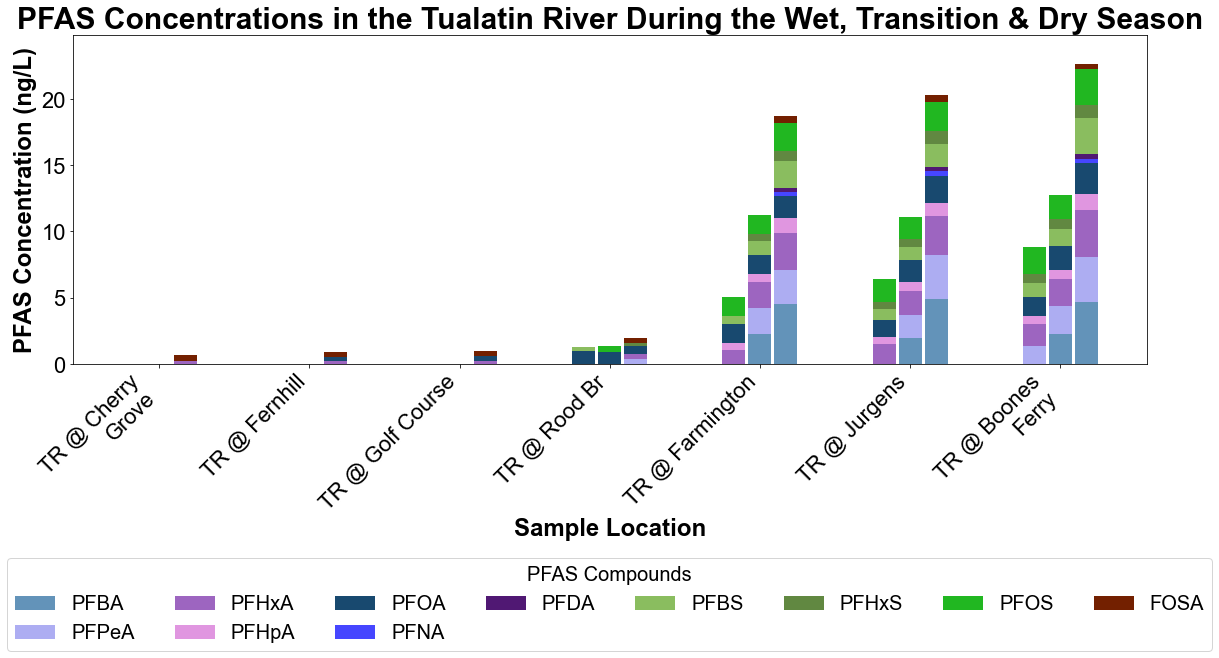

In [461]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_wet,season_2_data=avg_pivot_table_WetToDry, season_3_data=avg_pivot_table_dry,figsize=(18,16), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=22, legend_fontsize=20, bar_width=0.5,
                                   title='PFAS Concentrations in the Tualatin River During the Wet, Transition & Dry Season',rows_order=rows_order)

#### Upper Tributaries

In [467]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Scoggins Below Hagg','Gales @ Stringtown','Dairy @ Hwy 8','McKay @ Padgett']

rows_order= ['Scoggins Below Hagg','Gales @ Stringtown','Dairy @ Hwy 8','McKay @ Padgett']
rows_order_reverse=['McKay @ Padgett','Dairy @ Hwy 8','Gales @ Stringtown','Scoggins Below Hagg']

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [468]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)
avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

avg_pivot_table_dry.head()

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0.00,0,0,0,0
Gales @ Stringtown,0.0,0.00,0.00,0.00,0.34,0.00,0.00,0,0,0,...,0,0,0,0,0,0.36,0,0,0,0
Dairy @ Hwy 8,0.0,0.68,0.59,0.29,0.88,0.00,0.00,0,0,0,...,0,0,0,0,0,0.31,0,0,0,0
McKay @ Padgett,2.1,2.00,1.80,1.00,2.10,0.38,0.39,0,0,0,...,0,0,0,0,0,0.35,0,0,0,0


In [469]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_wet,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)
avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet.head()

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gales @ Stringtown,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dairy @ Hwy 8,0,0,0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
McKay @ Padgett,0,0,0,2.1,1.3,1.8,1.1,2.8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_WetToDry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_WetToDry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_WetToDry, end_date=end_date_WetToDry,col_name=col_name)
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

avg_pivot_table_WetToDry

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Scoggins Below Hagg,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
Gales @ Stringtown,0,0,0,0.0,0.0,0.0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
Dairy @ Hwy 8,0,0,0,0.0,0.0,0.0,0.00,0.69,0,0,...,0,0,0,0,0,0,0,0,0,0
McKay @ Padgett,0,0,0,2.2,1.9,1.7,0.88,2.70,0,0,...,0,0,0,0,0,0,0,0,0,0


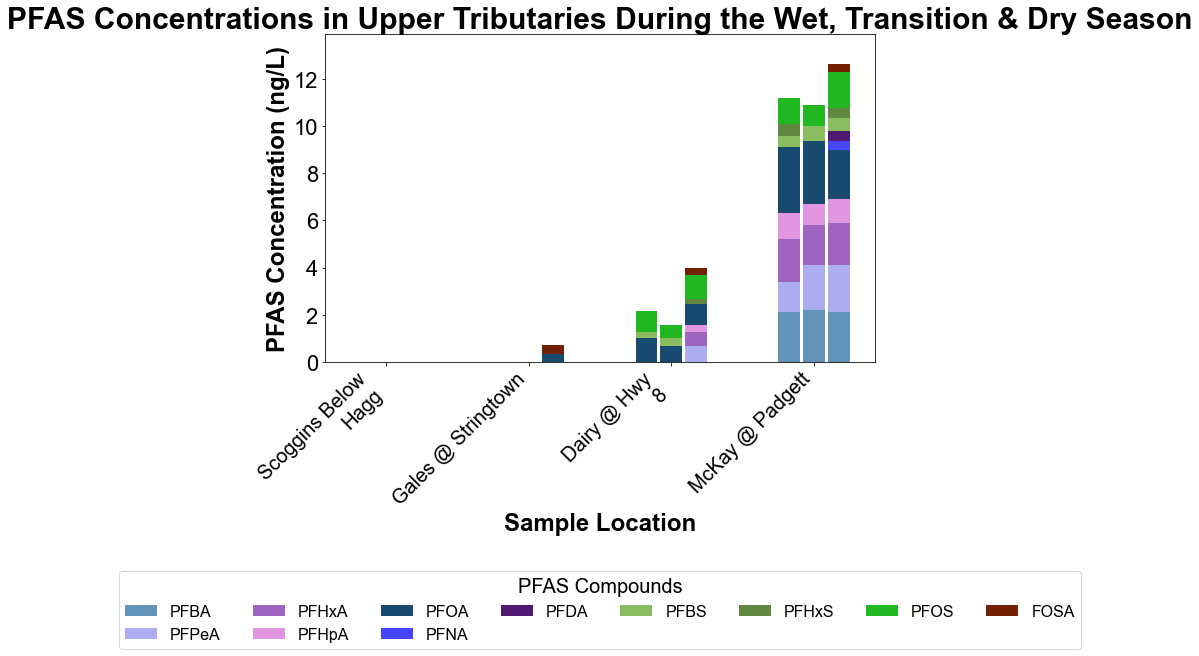

In [471]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_wet, season_2_data=avg_pivot_table_WetToDry,season_3_data=avg_pivot_table_dry,figsize=(12,16), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title='PFAS Concentrations in Upper Tributaries During the Wet, Transition & Dry Season',rows_order=rows_order)


#### Lower Tributaries

In [472]:
# Upper Tributaries
# Specify filter_qual_summary (list of str, optional): List of 'Qual Summary (Grade for filtering)' values to filter the data (default is None).
# (Eg. 'Good', 'Questionable', etc)
filter_qual_summary=['Good','Probably Ok','']

#Specify filter_pfas_compound (list of str, optional): List of 'PFAS Compound' values to filter the data (default is None).
filter_pfas_compound= data_compounds

#Specify filter_sample_location (list of str, optional): List of 'Sample Location' values to filter the data (default is None).
filter_sample_location= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']

rows_order= ['Rock Creek Effluent','Rock @ Brookwood','Chicken @ Sholls-Sherwood','Durham Effluent','Fanno at Durham Rd']
rows_order_reverse=['Fanno @ Durham Rd','Durham Effluent','Chicken @ Sholls-Sherwood','Rock @ Brookwood', 'Rock Creek Effluent']

col_name= 'Quant Incl Estimates Incl Qual Flags'

In [473]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_dry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_dry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_dry, end_date=end_date_dry,col_name=col_name)
avg_pivot_table_dry = avg_pivot_table_dry.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_dry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_dry = avg_pivot_table_dry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_dry = avg_pivot_table_dry[filtered_order]

#avg_pivot_table_dry.index = avg_pivot_table_dry.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table_dry.index = avg_pivot_table_dry.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_dry

PFAS Compound,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,PFUnA,PFDoA,PFTrDA,...,6:2FTS,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,10.0,9.80,13.0,1.80,11.9,8.50,10.000,0.9,0,0,...,0.83,0.47,0,0,0,1.20,0,0.00,0,0
Rock @ Brookwood,4.4,5.90,5.0,2.10,5.0,0.94,0.960,0.0,0,0,...,0.00,0.00,0,0,0,0.37,0,0.00,0,0
Chicken @ Sholls- Sherwood,0.0,1.50,1.2,0.47,1.2,0.00,0.000,0.0,0,0,...,0.00,0.00,0,0,0,0.32,0,0.37,0,0
Durham Effluent,3.0,8.85,9.4,1.00,6.4,0.45,0.365,0.0,0,0,...,0.00,0.00,0,0,0,0.00,0,0.00,0,0
Fanno at Durham Rd,4.1,6.20,5.9,2.90,7.3,1.10,1.300,0.0,0,0,...,0.00,0.00,0,0,0,0.38,0,0.00,0,0


In [474]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_wet = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_wet,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_wet, end_date=end_date_wet,col_name=col_name)
avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_wet.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_wet = avg_pivot_table_wet.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_wet = avg_pivot_table_wet[filtered_order]

avg_pivot_table_wet = avg_pivot_table_wet.rename(columns=pfas_mapping)

#avg_pivot_table_wet.index = avg_pivot_table_wet.index.str.replace('Fanno at', 'Fanno @')
avg_pivot_table_wet.index = avg_pivot_table_wet.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_wet

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,6:2FTS,8:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,0,0,0,24.0,19.0,21.0,6.10,11.0,1.5,0.76,...,0,0,0,0,0,0,0,0,0,0
Rock @ Brookwood,0,0,0,3.6,4.1,4.1,2.00,4.9,1.1,0.56,...,0,0,0,0,0,0,0,0,0,0
Chicken @ Sholls- Sherwood,0,0,0,0.0,1.4,1.3,0.76,1.6,1.1,0.00,...,0,0,0,0,0,0,0,0,0,0
Durham Effluent,0,0,0,10.0,8.8,9.4,2.80,7.4,1.0,0.59,...,0,0,0,0,0,0,0,0,0,0
Fanno at Durham Rd,0,0,0,3.5,5.8,5.3,2.60,0.0,1.0,0.76,...,0,0,0,0,0,0,0,0,0,0


In [475]:
# Example usage with filters: Create pivot table for avg. PFAS Compound values at various locations, 
# filtered by type of PFAS compound and sampling dates

avg_pivot_table_WetToDry = PivotTable_AvgPFASCompound_FilterByCompoundSamplingDatesLocation(data_df=data_df_WetToDry,filter_qual_summary=filter_qual_summary,filter_pfas_compound=filter_pfas_compound,filter_sample_location=filter_sample_location, 
                                                                                   start_date=start_date_WetToDry, end_date=end_date_WetToDry,col_name=col_name)
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.rename(columns=pfas_mapping)
#Reorder Compounds Based on PFAS Class and Chain Length
# Filter the desired_order to only include columns that exist in df
filtered_order = [comp for comp in desired_order if comp in avg_pivot_table_WetToDry.columns]

#Reorder rows based on sample location going downstream
# Reorder rows by indexing df with the filtered index order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry.loc[rows_order]

# Reorder columns by indexing df with the desired order
avg_pivot_table_WetToDry = avg_pivot_table_WetToDry[filtered_order]

avg_pivot_table_WetToDry.index = avg_pivot_table_WetToDry.index.str.replace('Sholls-', 'Sholls- ')
avg_pivot_table_WetToDry

PFAS Compound,3:3FTCA,5:3FTCA,7:3FTCA,PFBA,PFPeA,PFHxA,PFHpA,PFOA,PFNA,PFDA,...,8:2FTS,10:2FTS,NEtFOSA,NMeFOSA,FOSA,NEtFOSE,NMeFOSE,PFEESA,9Cl-PF3ONS,11Cl-PF3OUdS
Sample Location,,,,,,,,,,,,,,,,,,,,,
Rock Creek Effluent,0,0,0,0.0,7.6,10.0,0.00,5.8,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
Rock @ Brookwood,0,0,0,4.2,4.6,4.2,1.90,4.9,0.97,0.49,...,0,0,0,0,0,0,0,0,0,0
Chicken @ Sholls- Sherwood,0,0,0,0.0,0.0,1.4,0.69,1.5,1.20,0.00,...,0,0,0,0,0,0,0,0,0,0
Durham Effluent,0,0,0,0.0,6.7,9.9,0.00,7.8,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
Fanno at Durham Rd,0,0,0,3.6,5.5,5.1,2.30,7.4,0.99,0.98,...,0,0,0,0,0,0,0,0,0,0


In [476]:
# Assuming avg_pivot_table_Before, avg_pivot_table_During, avg_pivot_table_After are your datasets
dataframes = [avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet]
aligned_dataframes = align_dataframes(dataframes)

# Now aligned_dataframes[0], aligned_dataframes[1], and aligned_dataframes[2] have the same columns
avg_pivot_table_dry, avg_pivot_table_WetToDry, avg_pivot_table_wet = aligned_dataframes

In [477]:
#Re-define rows order since 'Chicken @ Sholls-Sherwood' changed to 'Chicken @ Sholls- Sherwood'
rows_order=['Rock Creek Effluent',
 'Rock @ Brookwood',
 'Chicken @ Sholls- Sherwood',
 'Durham Effluent',
 'Fanno at Durham Rd']

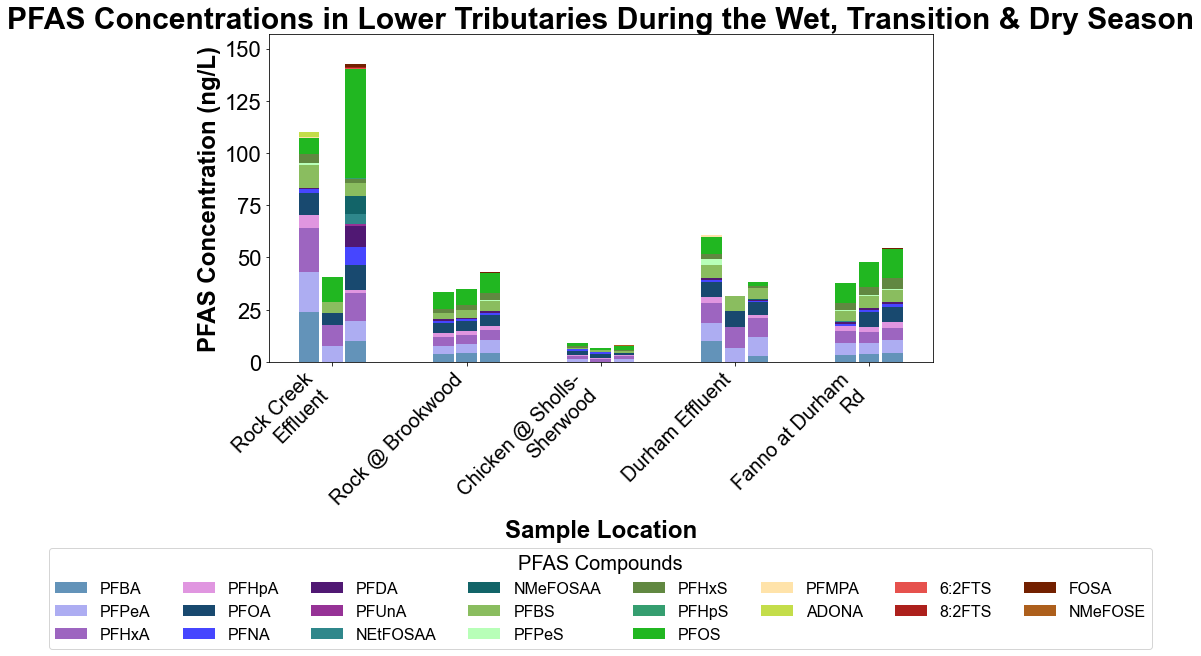

In [478]:
create_seasonal_stacked_bar_chart(season_1_data=avg_pivot_table_wet, season_2_data=avg_pivot_table_WetToDry,season_3_data=avg_pivot_table_dry,figsize=(14,16), compound_colors_dict=compound_colors_dict_abbrev,
                                   title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=16, bar_width=0.5,
                                   title='PFAS Concentrations in Lower Tributaries During the Wet, Transition & Dry Season',rows_order=rows_order)

### Mass Balance

#### Import Ambient Flows

In [479]:
# Specify the sheet name or index
#2023
#sheet_to_read = 'June 2023 Ambient Flows'
#Spring 2024
sheet_to_read='Spring2024 Ambient Flows'
#Specify where the file is saved use '/' instead of '\'
excel_file_path = 'U:/Research_and_Innovation/_ModellingGroupProjects/PFAS Investigations/Data and analysis/Database as of 01-30-2025.xlsm'
# Since you want to start at row 15, you need to skip the first 14 rows (considering the first row as row 1)
# Note: pandas uses 0-based indexing, so row 15 in Excel is row 14 in pandas, hence skiprows=14
skiprows = 1

# Number of rows to read starting from row 15 to row 87 is 87 - 15 + 1 = 73
# +1 because the end row is inclusive
nrows = 18

# Read the specified range of rows from the specified sheet
Flows_df = pd.read_excel(excel_file_path, sheet_name=sheet_to_read, skiprows=skiprows, nrows=nrows)

Flows_df.head()

,Unnamed: 0,WRRF Effluents for Ambient,February 2024 Flow (cfs),Flow_Date,April 2024 Flow (cfs),Flow Date,Source Notes,Ratio Feb/April,Unnamed: 8
0,NaN,TR @ Cherry Grove,288.00,2024-02-20,104.00,2024-04-16,OWRD 14202510,2.769231,NaN
1,NaN,Scoggins Below Hagg,13.30,2024-02-20,17.30,2024-04-16,OWRD 14202980,0.768786,"controlled by dam, so makes sense"
2,Trib,Gales @ Stringtown,372.00,2024-02-20,135.00,2024-04-16,OWRD 14204530,2.755556,NaN
3,NaN,TR @ Fernhill,918.94,2024-02-20,278.77,2024-04-16,"No Gage, used Golf Course minus FG effluent",3.296409,NaN
4,Effluent,Forest Grove Effluent,10.06,NaT,8.23,NaT,being transferred from May 23 to June 10th,1.222357,"less affected than rivers, so makes sense"


In [480]:
Flows_df.set_index('WRRF Effluents for Ambient', inplace=True)
Flows_df.head()

,Unnamed: 0,February 2024 Flow (cfs),Flow_Date,April 2024 Flow (cfs),Flow Date,Source Notes,Ratio Feb/April,Unnamed: 8
WRRF Effluents for Ambient,,,,,,,,
TR @ Cherry Grove,NaN,288.00,2024-02-20,104.00,2024-04-16,OWRD 14202510,2.769231,NaN
Scoggins Below Hagg,NaN,13.30,2024-02-20,17.30,2024-04-16,OWRD 14202980,0.768786,"controlled by dam, so makes sense"
Gales @ Stringtown,Trib,372.00,2024-02-20,135.00,2024-04-16,OWRD 14204530,2.755556,NaN
TR @ Fernhill,NaN,918.94,2024-02-20,278.77,2024-04-16,"No Gage, used Golf Course minus FG effluent",3.296409,NaN
Forest Grove Effluent,Effluent,10.06,NaT,8.23,NaT,being transferred from May 23 to June 10th,1.222357,"less affected than rivers, so makes sense"


#### Define Functions

In [481]:
def create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name):
    """
    Create a pivot table from the given dataframe with specified filters and date range.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
        start_date (str): Start date for filtering 'Sample Date'.
        end_date (str): End date for filtering 'Sample Date'.
        type_filter (list): Filter values for 'Type'.
        pfas_compound_filter (list): Filter values for 'PFAS Compound'.
        sample_location_filter (list): Filter values for 'Sample Location'.
        column_name (string): Name of the column to use for the pivot table values.

    Returns:
        pd.DataFrame: The resulting pivot table.
    """
    # Convert 'Sample Date' to datetime
    data_df['Sample Date'] = pd.to_datetime(data_df['Sample Date'])

    # Apply filters based on user-provided values
    filtered_data = data_df[
        data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
        (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
        (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
        data_df['Type'].isin(type_filter) &
        data_df['PFAS Compound'].isin(pfas_compound_filter) &
        data_df['Sample Location'].isin(sample_location_filter)
    ]

    # Create the pivot table
    pivot_table = pd.pivot_table(
        filtered_data,
        values=column_name,
        index='PFAS Compound',
        columns=['Type', 'Sample Location'],
        aggfunc='mean'
    )

    return pivot_table

In [492]:
def convert_to_mg_per_day_and_sum(df):
    # Copy the dataframe to avoid changing the original one
    converted_df = df.copy()

    # Add a new column for total PFAS initially with zeros
    converted_df['PFAS Total'] = 0.0

    # Convert ng/L to mg/day for each cell, excluding the 'PFAS Assumption' and 'Permitted Flow (MGD)' rows
    for column in converted_df.columns[:-1]:  # exclude the 'Total PFAS' column
        total_pfas = 0
        for index, value in converted_df.loc[:, column].items():
            if index not in ['PFAS Total', 'Flow (cfs)'] and pd.notna(value):
                # Get the flow in MGD for the current column
                flow_mgd = converted_df.at['Flow (cfs)', column]
                # Check if the flow is not NaN before proceeding with the calculation
                if pd.notna(flow_mgd):
                    # Convert ng/L to mg/day
                    converted_value = (value * flow_mgd * 2.446524)  # ng/L*cfs to mg/day conversion
                    converted_df.at[index, column] = converted_value
                    total_pfas += converted_value

        # Assign the sum to the 'Total PFAS' column for the current column
        converted_df.at['PFAS Total', column] = total_pfas

    return converted_df

In [493]:
def create_pfass_bar_chart(pfas_table, estimated_locations, measured_location, colors,
                           figsize=(12, 8), title='PFAS Mass (mg/day) per Compound',
                           title_fontsize=20, axis_label_fontsize=16, tick_label_fontsize=14, legend_fontsize=12):
    """
    Create a bar chart that groups 'Est' (stacked) and 'Meas' (single) values for PFAS compounds.

    Args:
        pfas_table (pd.DataFrame): DataFrame with multi-level columns for each PFAS compound.
        estimated_locations (list): List of locations contributing to 'Est' values.
        measured_location (str): Single location contributing to 'Meas' values.
        colors (dict): Dictionary mapping locations to colors.
        figsize (tuple): Figure size.
        title (str): Chart title.
        title_fontsize (int): Font size for the title.
        axis_label_fontsize (int): Font size for the x and y axis labels.
        tick_label_fontsize (int): Font size for the tick labels.
        legend_fontsize (int): Font size for the legend.
    """
    try:
        fig, ax = plt.subplots(figsize=figsize)
        compounds = pfas_table.columns.get_level_values(0).unique()
        n_groups = len(compounds)
        bar_width = 0.35
        index = np.arange(n_groups) * 2  # Increase spacing between groups
        gap_between_est_meas = 0.05  # Added gap between "Estimated" and "Measured"

        legend_handles = []

        for i, compound in enumerate(compounds):
            est_pos = index[i] - gap_between_est_meas / 2
            meas_pos = index[i] + bar_width + gap_between_est_meas / 2

            estimated_bottom = 0
            for loc in estimated_locations:
                height = pfas_table.loc[loc, (compound, 'Estimated')]
                bar = ax.bar(est_pos, height, bar_width, bottom=estimated_bottom, color=colors[loc], label=f"{loc}" if i == 0 else "")
                estimated_bottom += height
                if i == 0 and height > 0:
                    legend_handles.append(bar)

            measured_height = pfas_table.loc[measured_location, (compound, 'Measured')]
            if measured_height > 0:
                bar = ax.bar(meas_pos, measured_height, bar_width, color=colors[measured_location], label=f"{measured_location}" if i == 0 else "")
                if i == 0:
                    legend_handles.append(bar)

        ax.set_xticks(index + bar_width / 2)
        compound_labels = [f"{comp}\nEst  Meas" for comp in compounds]
        ax.xaxis.set_major_locator(FixedLocator(index + bar_width / 2))
        ax.xaxis.set_major_formatter(FixedFormatter(compound_labels))

        ax.set_xlabel('PFAS Compounds', fontsize=axis_label_fontsize)
        ax.set_ylabel('PFAS Mass (mg/day)', fontsize=axis_label_fontsize)
        ax.set_title(title, fontsize=title_fontsize)
        ax.legend(handles=legend_handles, bbox_to_anchor=(0.5, -0.15), loc='upper center', title='Sample Locations', ncol=4, fontsize=legend_fontsize,title_fontsize=legend_fontsize+2)

        plt.xticks(fontsize=tick_label_fontsize)
        plt.yticks(fontsize=tick_label_fontsize)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")


#### Set Filters and Settings

In [494]:
#qual_summary_filter (list): Filter values for 'Qual Summary (Grade for filtering)'.
qual_summary_filter=filter_qual_summary = ['Good','Probably Ok','']

#type_filter (list): Filter values for 'Type'.
type_filter=['Ambient','Effluent']

#pfas_compound_filter (list): Filter values for 'PFAS Compound'.
pfas_compound_filter = ['Perfluorobutanesulfonic acid','Perfluorobutanoic acid','Perfluorodecanoic acid','Perfluoroheptanoic acid','Perfluorohexanesulfonic acid',
                        'Perfluorohexanoic acid','Perfluorononanoic acid','Perfluorooctanesulfonamide','Perfluorooctanesulfonic acid (PFOS)','Perfluorooctanoic acid (PFOA)',
                        'Perfluoropentanesulfonic acid','Perfluoropentanoic acid']

#sample_location_filter (list): Filter values for 'Sample Location'.
sample_location_filter = ['Chicken @ Sholls-Sherwood','Dairy @ Hwy 8','Fanno at Durham Rd','Gales @ Stringtown','Rock @ Brookwood',
                          'Scoggins Below Hagg','TR @ Boones Ferry','TR @ Cherry Grove','TR @ Farmington','TR @ Fernhill','TR @ Golf Course','TR @ Jurgens',
                          'TR @ Rood Br','Durham Effluent','Rock Creek Effluent','Forest Grove Effluent']

#column_name (string): Name of the column to use for the pivot table values.
column_name='All (w BDL= MDL/2) Incl Qual Flags'

# Lists provided by the user

#Rock Creek Confluence
estimated_sample_location = ['TR @ Rood Br','Rock Creek Effluent','Rock @ Brookwood']
measured_sample_location = ['TR @ Farmington']

estimated_locations = estimated_sample_location
measured_location = 'TR @ Farmington'

#Fanno Creek Confluence
#estimated_sample_location = ['TR @ Jurgens','Durham Effluent','Fanno at Durham Rd']
#measured_sample_location = ['TR @ Boones Ferry']

#estimated_locations = estimated_sample_location
#measured_location = 'TR @ Boones Ferry'

colors = {
    'TR @ Rood Br': (173/255, 173/255, 242/255),
    'Rock Creek Effluent': (205/255, 69/255, 109/255),
    'Rock @ Brookwood': (230/255, 120/255, 77/255),
    'TR @ Farmington': (53/255, 158/255, 112/255),
    'Forest Grove Effluent': (230/255, 216/255, 77/255),
    'Durham Effluent': (47/255,135/255,139/255),
    'TR @ Jurgens':(173/255, 173/255, 242/255),
    'Durham Effluent': (205/255, 69/255, 109/255),
    'Fanno at Durham Rd':(230/255, 120/255, 77/255),
    'TR @ Boones Ferry':(53/255, 158/255, 112/255)
}



In [495]:
#2023 Data
#start_date (str): Start date for filtering 'Sample Date'.
start_date='2023-04-01'

#end_date (str): End date for filtering 'Sample Date'.
end_date='2023-06-30'

In [496]:
#2024 Data
#start_date (str): Start date for filtering 'Sample Date'.
start_date='2024-03-12'

#end_date (str): End date for filtering 'Sample Date'.
end_date='2024-04-17'


In [497]:
    # Apply filters based on user-provided values
filtered_data = data_df[
    data_df['Qual Summary (Grade for filtering)'].isin(qual_summary_filter) &
    (data_df['Sample Date'] >= pd.to_datetime(start_date)) &
    (data_df['Sample Date'] <= pd.to_datetime(end_date)) &
    data_df['Type'].isin(type_filter) &
    data_df['PFAS Compound'].isin(pfas_compound_filter) &
    data_df['Sample Location'].isin(sample_location_filter)
]
filtered_data.head()

,Sampling point Date Component,Sample Number,Sampling Point,Sample Name,Sampled Date,Analysis,Component,Qualifiers,Result,Units,...,ChainLength,Pseudonym,Dominant Contributor,Sector,Depth,Edit Notes,Field,Notes,Region,Crop
27458,DM EFF-3/12/2024 11:15 AM-Perfluorobutanesulfo...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorobutanesulfonic Acid (Report),NaN,6.5,ppt_wt_v,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27459,DM EFF-3/12/2024 11:15 AM-Perfluorobutanoic Ac...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorobutanoic Acid (Report),NaN,10,ppt_wt_v,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27461,DM EFF-3/12/2024 11:15 AM-Perfluorodecanoic Ac...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorodecanoic Acid (Report),NaN,0.59,ppt_wt_v,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27465,DM EFF-3/12/2024 11:15 AM-Perfluoroheptanoic A...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluoroheptanoic Acid (Report),NaN,2.8,ppt_wt_v,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27466,DM EFF-3/12/2024 11:15 AM-Perfluorohexanesulfo...,492576.0,DM EFF,PFAS Monitoring - Q1-2024,2024-03-12 11:15:00,PFAS-CL,Perfluorohexanesulfonic Acid (Report),NaN,2.6,ppt_wt_v,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Pivot Table for Concentrations

In [498]:
Allpivot_table=create_filtered_pivot_table(data_df, qual_summary_filter, start_date, end_date, type_filter, pfas_compound_filter, sample_location_filter,column_name)
Allpivot_table=Allpivot_table.transpose().reset_index(level=0, drop=True)
# Rename the index of data_df using the mapping (No need to change)
Allpivot_table.columns = Allpivot_table.columns.map(pfas_mapping)

# Add a column to sum all PFAS concentrations per location
Allpivot_table['PFAS Total'] = Allpivot_table.sum(axis=1)

# Map 'June 2023 Flow (cfs)' from Flows_df to the new column in pivot_table
#Allpivot_table['Flow (cfs)'] = Allpivot_table.index.map(Flows_df['June 2023 Flow (cfs)'])
Allpivot_table['Flow (cfs)'] = Allpivot_table.index.map(Flows_df['April 2024 Flow (cfs)'])

Allpivot_table

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total,Flow (cfs)
Sample Location,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,0.910,0.90,0.220,0.690,0.250,1.400,1.200,0.2200,1.200,1.500,0.220,0.440,9.1500,14.8910
Dairy @ Hwy 8,0.310,0.90,0.220,0.230,0.255,0.220,0.220,0.2200,0.580,0.690,0.220,0.445,4.5100,212.0000
Fanno at Durham Rd,5.100,3.85,0.790,2.350,3.450,4.900,1.045,0.2325,11.000,7.550,0.575,5.300,46.1425,17.4000
Gales @ Stringtown,0.140,0.95,0.235,0.245,0.270,0.235,0.235,0.2350,0.235,0.300,0.235,0.470,3.7850,135.0000
Rock @ Brookwood,3.800,4.20,0.490,1.900,2.400,4.200,0.970,0.2300,7.500,4.900,0.230,4.600,35.4200,123.1600
Scoggins Below Hagg,0.140,0.95,0.235,0.245,0.270,0.235,0.235,0.2350,0.235,0.300,0.235,0.470,3.7850,17.3000
TR @ Boones Ferry,1.300,2.30,0.230,0.690,0.750,2.000,0.230,0.2300,1.800,1.800,0.230,2.100,13.6600,790.4955
TR @ Cherry Grove,0.150,1.00,0.245,0.255,0.280,0.245,0.245,0.2450,0.245,0.315,0.245,0.490,3.9600,104.0000
TR @ Farmington,1.000,2.30,0.230,0.560,0.550,2.000,0.230,0.2300,1.400,1.500,0.230,1.900,12.1300,681.0000


### Convert to Mass (mg/day)

In [499]:
mass_pivot= convert_to_mg_per_day_and_sum(Allpivot_table.T).T
mass_pivot

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total,Flow (cfs)
Sample Location,,,,,,,,,,,,,,
Chicken @ Sholls-Sherwood,33.152382,32.788070,8.014862,25.137520,9.107797,51.003664,43.717427,8.014862,43.717427,54.646783,8.014862,16.029723,333.345378,14.8910
Dairy @ Hwy 8,160.785557,466.796779,114.105879,119.292510,132.259087,114.105879,114.105879,114.105879,300.824591,357.877531,114.105879,230.805074,2339.170527,212.0000
Fanno at Durham Rd,217.104540,163.892643,33.629919,100.038366,146.864836,208.590636,44.485146,9.897413,468.264694,321.399858,24.477473,225.618443,1964.263966,17.4000
Gales @ Stringtown,46.239304,313.766703,77.615974,80.918781,89.175800,77.615974,77.615974,77.615974,77.615974,99.084222,77.615974,155.231948,1250.112601,135.0000
Rock @ Brookwood,1144.992804,1265.518363,147.643809,572.496402,723.153350,1265.518363,292.274479,69.302196,2259.854219,1476.438090,69.302196,1386.043921,10672.538191,123.1600
Scoggins Below Hagg,5.925481,40.208622,9.946343,10.369592,11.427714,9.946343,9.946343,9.946343,9.946343,12.697460,9.946343,19.892687,160.199615,17.3000
TR @ Boones Ferry,2514.156076,4448.122289,444.812229,1334.436687,1450.474659,3867.932425,444.812229,444.812229,3481.139183,3481.139183,444.812229,4061.329047,26417.978465,790.4955
TR @ Cherry Grove,38.165774,254.438496,62.337432,64.881816,71.242779,62.337432,62.337432,62.337432,62.337432,80.148126,62.337432,124.674863,1007.576444,104.0000
TR @ Farmington,1666.082844,3831.990541,383.199054,933.006393,916.345564,3332.165688,383.199054,383.199054,2332.515982,2499.124266,383.199054,3165.557404,20209.584898,681.0000


In [500]:
#Filter Table for Sample Locations that are actually needed for the analysis.
#Rock Creek
mass_pivot_filtered=mass_pivot.loc[['TR @ Rood Br','Rock Creek Effluent','Rock @ Brookwood','TR @ Farmington']].drop('Flow (cfs)', axis=1)
#Fanno Creek
#mass_pivot_filtered=mass_pivot.loc[['TR @ Jurgens','Durham Effluent','Fanno at Durham Rd','TR @ Boones Ferry']].drop('Flow (cfs)', axis=1)

mass_pivot_filtered

PFAS Compound,PFBS,PFBA,PFDA,PFHpA,PFHxS,PFHxA,PFNA,FOSA,PFOS,PFOA,PFPeS,PFPeA,PFAS Total
Sample Location,,,,,,,,,,,,,
TR @ Rood Br,171.599193,1164.423098,288.041503,294.170046,324.812759,288.041503,288.041503,288.041503,600.597177,1115.394757,288.041503,569.954464,5681.159009
Rock Creek Effluent,1529.664666,3337.450180,105.685922,848.268587,597.959824,2920.268907,208.590636,30.593293,1070.765266,1529.664666,116.810756,2642.148059,14937.870763
Rock @ Brookwood,1144.992804,1265.518363,147.643809,572.496402,723.153350,1265.518363,292.274479,69.302196,2259.854219,1476.438090,69.302196,1386.043921,10672.538191
TR @ Farmington,1666.082844,3831.990541,383.199054,933.006393,916.345564,3332.165688,383.199054,383.199054,2332.515982,2499.124266,383.199054,3165.557404,20209.584898


#### Create Table for Estimated vs Measured PFAS Mass at TR @ Boones Ferry

In [501]:
# Creating a new DataFrame with two level columns
new_columns = pd.MultiIndex.from_product([mass_pivot_filtered.columns, ['Estimated', 'Measured']])
new_table = pd.DataFrame(index=mass_pivot_filtered.index, columns=new_columns)

# Populating the new table based on the user lists
for comp in mass_pivot_filtered.columns:
    new_table[(comp, 'Estimated')] = np.where(mass_pivot_filtered.index.isin(estimated_sample_location), mass_pivot_filtered[comp], np.nan)
    new_table[(comp, 'Measured')] = np.where(mass_pivot_filtered.index.isin(measured_sample_location), mass_pivot_filtered[comp], np.nan)

new_table

PFAS Compound               PFBS                      PFBA               \
                       Estimated     Measured    Estimated     Measured   
Sample Location                                                           
TR @ Rood Br          171.599193          NaN  1164.423098          NaN   
Rock Creek Effluent  1529.664666          NaN  3337.450180          NaN   
Rock @ Brookwood     1144.992804          NaN  1265.518363          NaN   
TR @ Farmington              NaN  1666.082844          NaN  3831.990541   

PFAS Compound              PFDA                   PFHpA              \
                      Estimated    Measured   Estimated    Measured   
Sample Location                                                       
TR @ Rood Br         288.041503         NaN  294.170046         NaN   
Rock Creek Effluent  105.685922         NaN  848.268587         NaN   
Rock @ Brookwood     147.643809         NaN  572.496402         NaN   
TR @ Farmington             NaN  383.199054         NaN  933.006393   

PFAS Compound             PFHxS              ...         PFOS               \
                      Estimated    Measured  ...    Estimated     Measured   
Sample Location                              ...                             
TR @ Rood Br         324.812759         NaN  ...   600.597177          NaN   
Rock Creek Effluent  597.959824         NaN  ...  1070.765266          NaN   
Rock @ Brookwood     723.153350         NaN  ...  2259.854219          NaN   
TR @ Farmington             NaN  916.345564  ...          NaN  2332.515982   

PFAS Compound               PFOA                    PFPeS              \
                       Estimated     Measured   Estimated    Measured   
Sample Location                                                         
TR @ Rood Br         1115.394757          NaN  288.041503         NaN   
Rock Creek Effluent  1529.664666          NaN  116.810756         NaN   
Rock @ Brookwood     1476.438090          NaN   69.302196         NaN   
TR @ Farmington              NaN  2499.124266         NaN  383.199054   

PFAS Compound              PFPeA                 PFAS Total                
                       Estimated     Measured     Estimated      Measured  
Sample Location                                                            
TR @ Rood Br          569.954464          NaN   5681.159009           NaN  
Rock Creek Effluent  2642.148059          NaN  14937.870763           NaN  
Rock @ Brookwood     1386.043921          NaN  10672.538191           NaN  
TR @ Farmington              NaN  3165.557404           NaN  20209.584898  

[4 rows x 26 columns]

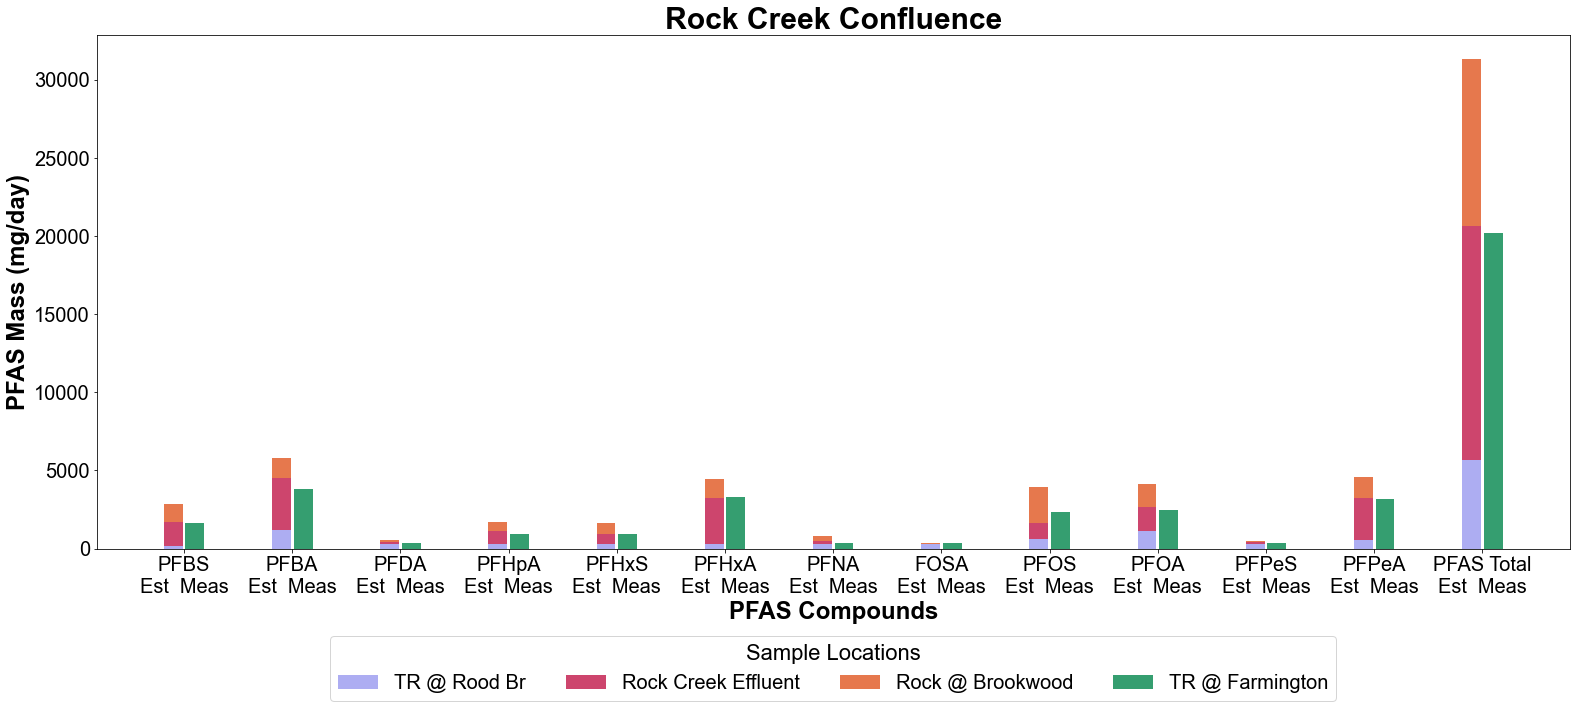

In [502]:
create_pfass_bar_chart(pfas_table=new_table,estimated_locations=estimated_locations,measured_location=measured_location , colors=colors,
                           figsize=(22, 10), title='Rock Creek Confluence',
                            title_fontsize=30, axis_label_fontsize=24, tick_label_fontsize=20, legend_fontsize=20)

In [220]:
#dfs: A dictionary where keys are the tab names and values are the DataFrames to write.
dfs = {'MassBalanceRC2024': new_table,
       'FilteredData': filtered_data}

#filename: The name of the Excel file to write to.
filename= 'MassBalanceRC2024.xlsx'
dfs_to_excel(dfs, filename)

File 'MassBalanceRC2024.xlsx' has been written with 2 tabs.
